<a href="https://colab.research.google.com/github/lukyg/Credit_Risk_Prediction/blob/main/Final_Project_PBI_Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bussiness Use Case

Sebuah perusahaan pemberi pinjaman (multifinance) ingin mengoptimalkan keputusan
bisnis dan mengurangi potensi kerugian dengan meningkatkan keakuratan dalam menilaidan mengelola resiko kredit.

#Data Understanding

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [215]:
# Models
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [216]:
url_dataset = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"

In [217]:
df = pd.read_csv(url_dataset, index_col=0)

In [218]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
df.shape

(466285, 74)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

Setelah dataset berhasil diimport dan dibuat dataframe, terdapat 74 kolom dengan 466285 baris data yang terdiri dari:
1. Target prediksi (Y) yakni variabel loan_status terdiri dari beberapa kategori seperti current, fully paid dan charge off. Dan perlu diubah menjadi status Good atau Bad untuk masing-masing kategori.
2. Selain dari variabel loan_status merupakan kolom yang digunakan sebagai fitur (X) untuk melakukan prediksi terhadap target
3. Beberapa kolom memiliki nilai NaN bahkan terdapat beberapa kolom yang kosong.
4. Sebanyak 46 kolom bertipe data float, 6 kolom bertipe data integer dan 22 kolom bertipe data object.

In [221]:
jumlah_baris = df['id'].nunique()
jumlah_unik = df['member_id'].nunique()

if jumlah_baris == jumlah_unik:
  print('Jumlah data mewakili setiap individu')
else:
  print('Terdapat duplikasi pada data')

Jumlah data mewakili setiap individu


#Feature Engineering

## Drop Unused Columns

In [222]:
#Memilah kolom yang kosong
null_col = df.isnull().mean()
null_col[null_col==1].index

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [223]:
df.drop(null_col[null_col==1].index, axis=1, inplace=True)

In [224]:
#Menghilangkan kolom id
df.drop(['id','member_id'], axis=1, inplace=True)

In [225]:
#Menghilangkan kolom free text
df.drop(['url', 'desc'], axis=1, inplace=True)

In [226]:
#Menghilangkan kolom bernilai konstan dan lain-lain
const_col = ['zip_code', 'mths_since_last_major_derog','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'sub_grade']
df.drop(const_col, axis=1, inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status        

## Target Variable/Label

In [228]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Pada variabel loan_status memiliki beberapa nilai dengan definisi sebagai berikut:
1. Current artinya pembayaran lancar.
2. Fully Paid artinya pembayaran penuh/lunas.
3. Charge Off artinya hutang yang dianggap tidak dapat ditagih oleh pemberi pinjaman dan telah dihapuskan sebagai kerugian.
4. Late artinya pembayaran terlambat.
5. In Grace Period artinya masa tenggang.
6. Default artinya pembayaran macet.

Sehingga dari masing-masing nilai dari variabel loan_status dapat dikategorikan sebagai good loan atau bad loan.

In [229]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_loan'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [230]:
df['bad_loan'].value_counts(normalize=True)*100

bad_loan
0    89.069346
1    10.930654
Name: proportion, dtype: float64

Terlihat bahwa jumlah bad loan lebih sedikit dibandingkan dengan good loan sehingga data tersebut memiliki masalah imbalance pada dataset.

In [231]:
df.drop('loan_status', axis=1, inplace=True)

## Parsing Data

### Parsing: emp_length

In [232]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Pada variabel emp_length merupakan lama atau durasi peminjam bekerja. Pada variabel tersebut nilai perlu dilakukan parsing agar menjadi satuan yang baku, misalnya dirubah menjadi format data angka.

In [233]:
def emp_length_convert(df, column):
    df[column] = df[column].str.replace(' years', '').str.replace('+', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)


emp_length_convert(df, 'emp_length')

df['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [234]:
df['emp_length'].sample(5)

30985     10.0
270793     6.0
146321     1.0
259895    10.0
354796     1.0
Name: emp_length, dtype: float64

### Parsing: term

In [235]:
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

term_numeric(df, 'term')

In [236]:
df['term'].sample(5)

54627     60
343940    60
182693    36
47794     60
113657    36
Name: term, dtype: int64

### Parsing: dates

In [237]:
def date_columns(df, column):
    #Mengatur tanggal referensi
    today_date = pd.to_datetime('2016-01-01')

    #konversi ke format date time
    df[column] = pd.to_datetime(df[column], format = "%b-%y")

    #kalkulasi selisih bulan dan membuat kolom baru
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))

    #Membuat hasil yang bernilai negatif menjadi nilai maksimum
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)

    df.drop(columns = [column], inplace = True)

In [238]:
date_columns(df, 'earliest_cr_line')

In [239]:
print(df['mths_since_earliest_cr_line'].sample(7))

33061     191.0
350840    122.0
35811     201.0
210433    158.0
14326     183.0
60718     177.0
454273    212.0
Name: mths_since_earliest_cr_line, dtype: float64


In [240]:
date_columns(df, 'issue_d')

In [241]:
print(df['mths_since_issue_d'].sample(7))

81647     27.0
111617    28.0
37762     82.0
400644    21.0
376322    19.0
73134     27.0
447154    23.0
Name: mths_since_issue_d, dtype: float64


In [242]:
date_columns(df, 'last_pymnt_d')

In [243]:
print(df['mths_since_last_pymnt_d'].sample(7))

9555      23.0
450690    17.0
56013      0.0
153306     0.0
286998    10.0
406309     6.0
94947      0.0
Name: mths_since_last_pymnt_d, dtype: float64


In [244]:
date_columns(df, 'next_pymnt_d')

In [245]:
print(df['mths_since_next_pymnt_d'].sample(7))

81812     95.0
246783    95.0
108801    95.0
438762     NaN
113640    95.0
115013    95.0
264001     0.0
Name: mths_since_next_pymnt_d, dtype: float64


In [246]:
date_columns(df, 'last_credit_pull_d')

In [247]:
print(df['mths_since_last_credit_pull_d'].sample(7))

218657    20.0
35363     39.0
49878      0.0
100353     0.0
433622     0.0
277587     0.0
376743     0.0
Name: mths_since_last_credit_pull_d, dtype: float64


Memodifikasi tanggal-tanggal pada variabel issue_d, last_payment_d, last_credit_pull_d, next_pymnt_d dan earliest_cr_line dari format bulan-tahun menjadi perhitungan berapa lama waktu sejak waktu tersebut dalam bulan. Untuk itu perlu ditentukan tanggal referensi sebagai acuan. Karena dataset yang digunakan yakni dataset tahun 2007-2014, penggunaan tanggal 2016-1-1 menjadi lebih relevan.

#EDA (Exploratory Data Analysis)

## Correlation Check

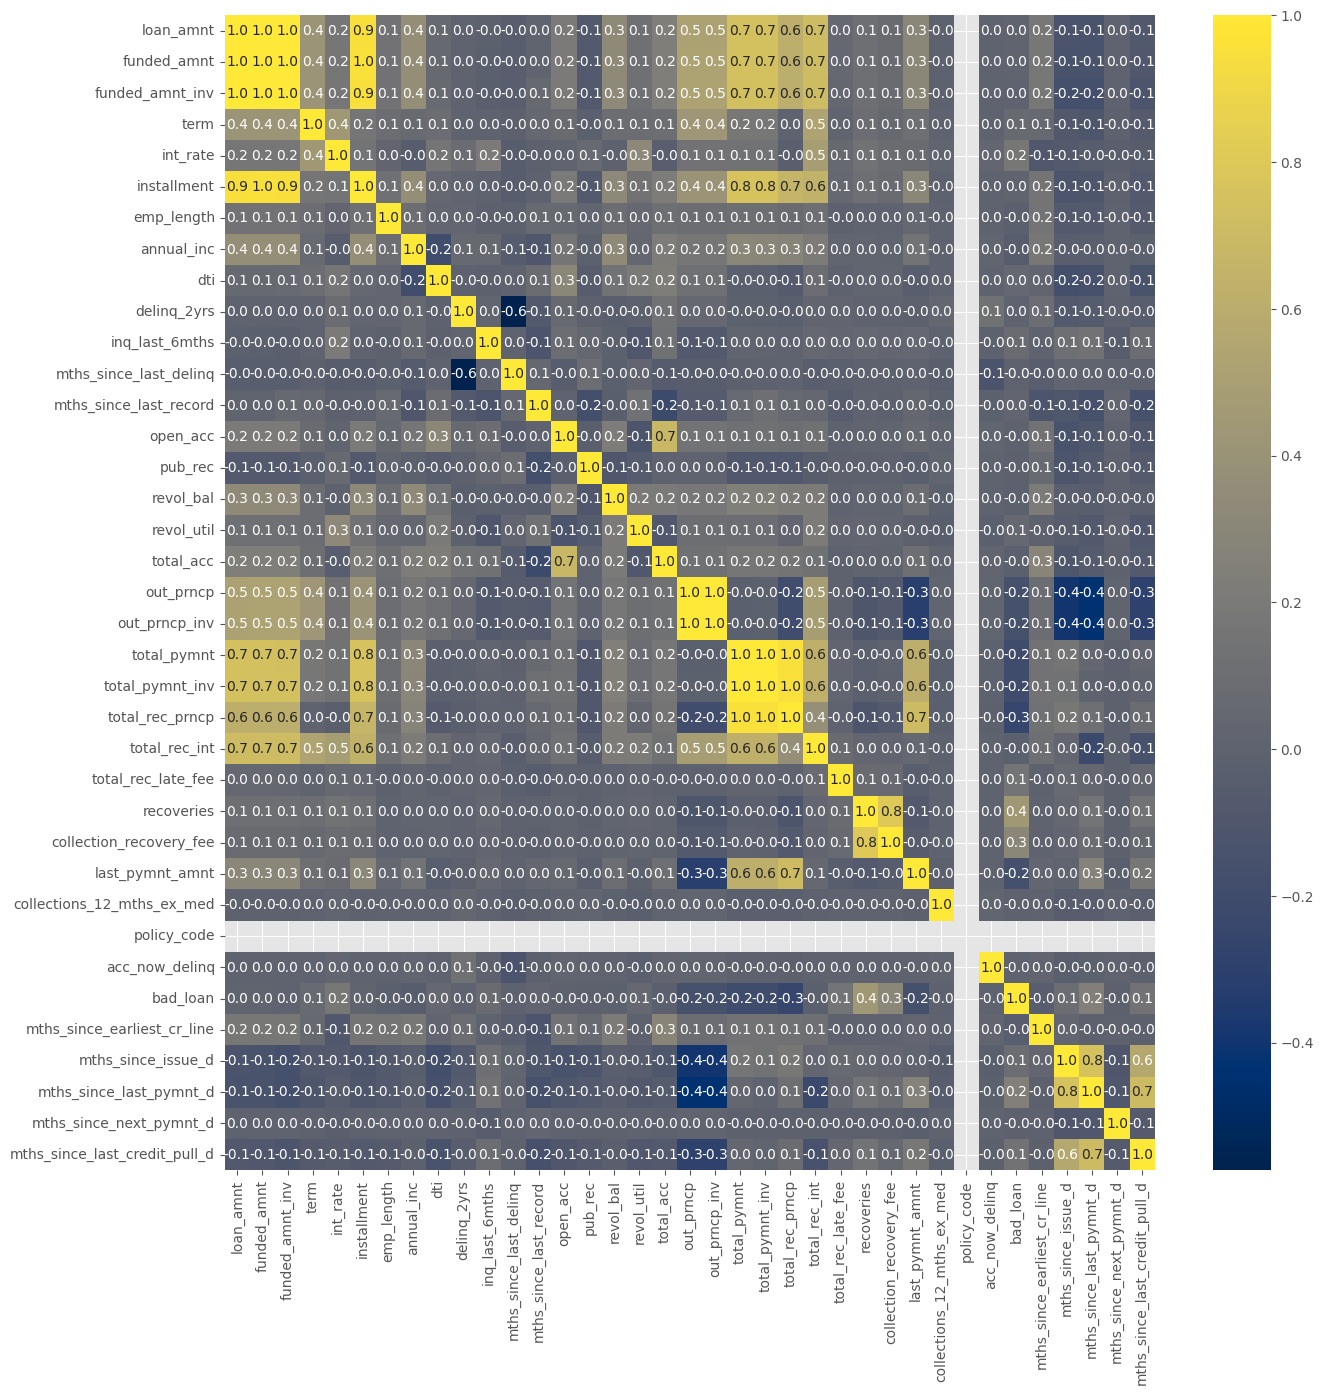

In [248]:
corrMatrix = df.select_dtypes(exclude='object').corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, fmt=".1f", cmap="cividis")
plt.show()

## Descriptive Statistics

In [249]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.28,8286.51,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.0,14291.80,8274.37,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt_inv,466285.0,14222.33,8297.64,0.00,8000.00,12000.00,19950.00,35000.00
term,466285.0,42.61,10.72,36.00,36.00,36.00,60.00,60.00
int_rate,466285.0,13.83,4.36,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.06,243.49,15.67,256.69,379.89,566.58,1409.99
emp_length,466285.0,5.72,3.76,0.00,2.00,6.00,10.00,10.00
annual_inc,466281.0,73277.38,54963.57,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.22,7.85,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.28,0.80,0.00,0.00,0.00,0.00,29.00


## Missing Value

In [250]:
string_null = df.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

mths_since_last_record           403647
mths_since_last_delinq           250351
mths_since_next_pymnt_d          227214
emp_title                         27588
mths_since_last_pymnt_d             376
revol_util                          340
collections_12_mths_ex_med          145
mths_since_last_credit_pull_d        42
delinq_2yrs                          29
total_acc                            29
mths_since_earliest_cr_line          29
acc_now_delinq                       29
pub_rec                              29
open_acc                             29
inq_last_6mths                       29
title                                21
annual_inc                            4
recoveries                            0
collection_recovery_fee               0
total_pymnt                           0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
total_rec_late_fee                    0
bad_loan                              0


Pada data ditemukan beberapa variabel yang memiliki nilai null, sehingga nantinya perlu dilakukan penanganan agar data yang digunakan dapat digunakan untuk proses modeling.

## Cardinality Data Check

### Categorical Data

In [251]:
print(df.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64


In [252]:
df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

Pada tahap ini data akan diseleksi berdasarkan jumlah data unik pada kolom kategorikal, misalnya kolom yang bernilai seragam atau kolom teks bebas yang tidak diperlukan.

### Numerical Data

In [253]:
print(df.select_dtypes(exclude='object').nunique())

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
term                                  2
int_rate                            506
installment                       55622
emp_length                           11
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808


In [254]:
df.drop('policy_code', axis=1, inplace=True)

Pada kolom bertipe numerik juga dilakukan seleksi pada kolom yang memiliki nilai seragam.

In [255]:
for col in df.select_dtypes(include='object').columns.tolist():
  print('Distribusi nilai untuk fitur', col)
  print(df[col].value_counts(normalize=True)*100)
  print('\n')

Distribusi nilai untuk fitur grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Distribusi nilai untuk fitur home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Distribusi nilai untuk fitur verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Distribusi nilai untuk fitur pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


Distribusi nilai untuk fitur purpose
purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical            

Pada tahap ini, data kategorikal diseleksi berdasarkan distribusi datanya, bila didominasi oleh satu nilai maka kolom tersebut perlu dibuang. Pada dataset ini ditemukan bahwa kolom pymnt_plan didominasi oleh satu nilai.

In [256]:
df.drop('pymnt_plan', axis=1, inplace=True)

## Univariate Analysis

### Categorical Data

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


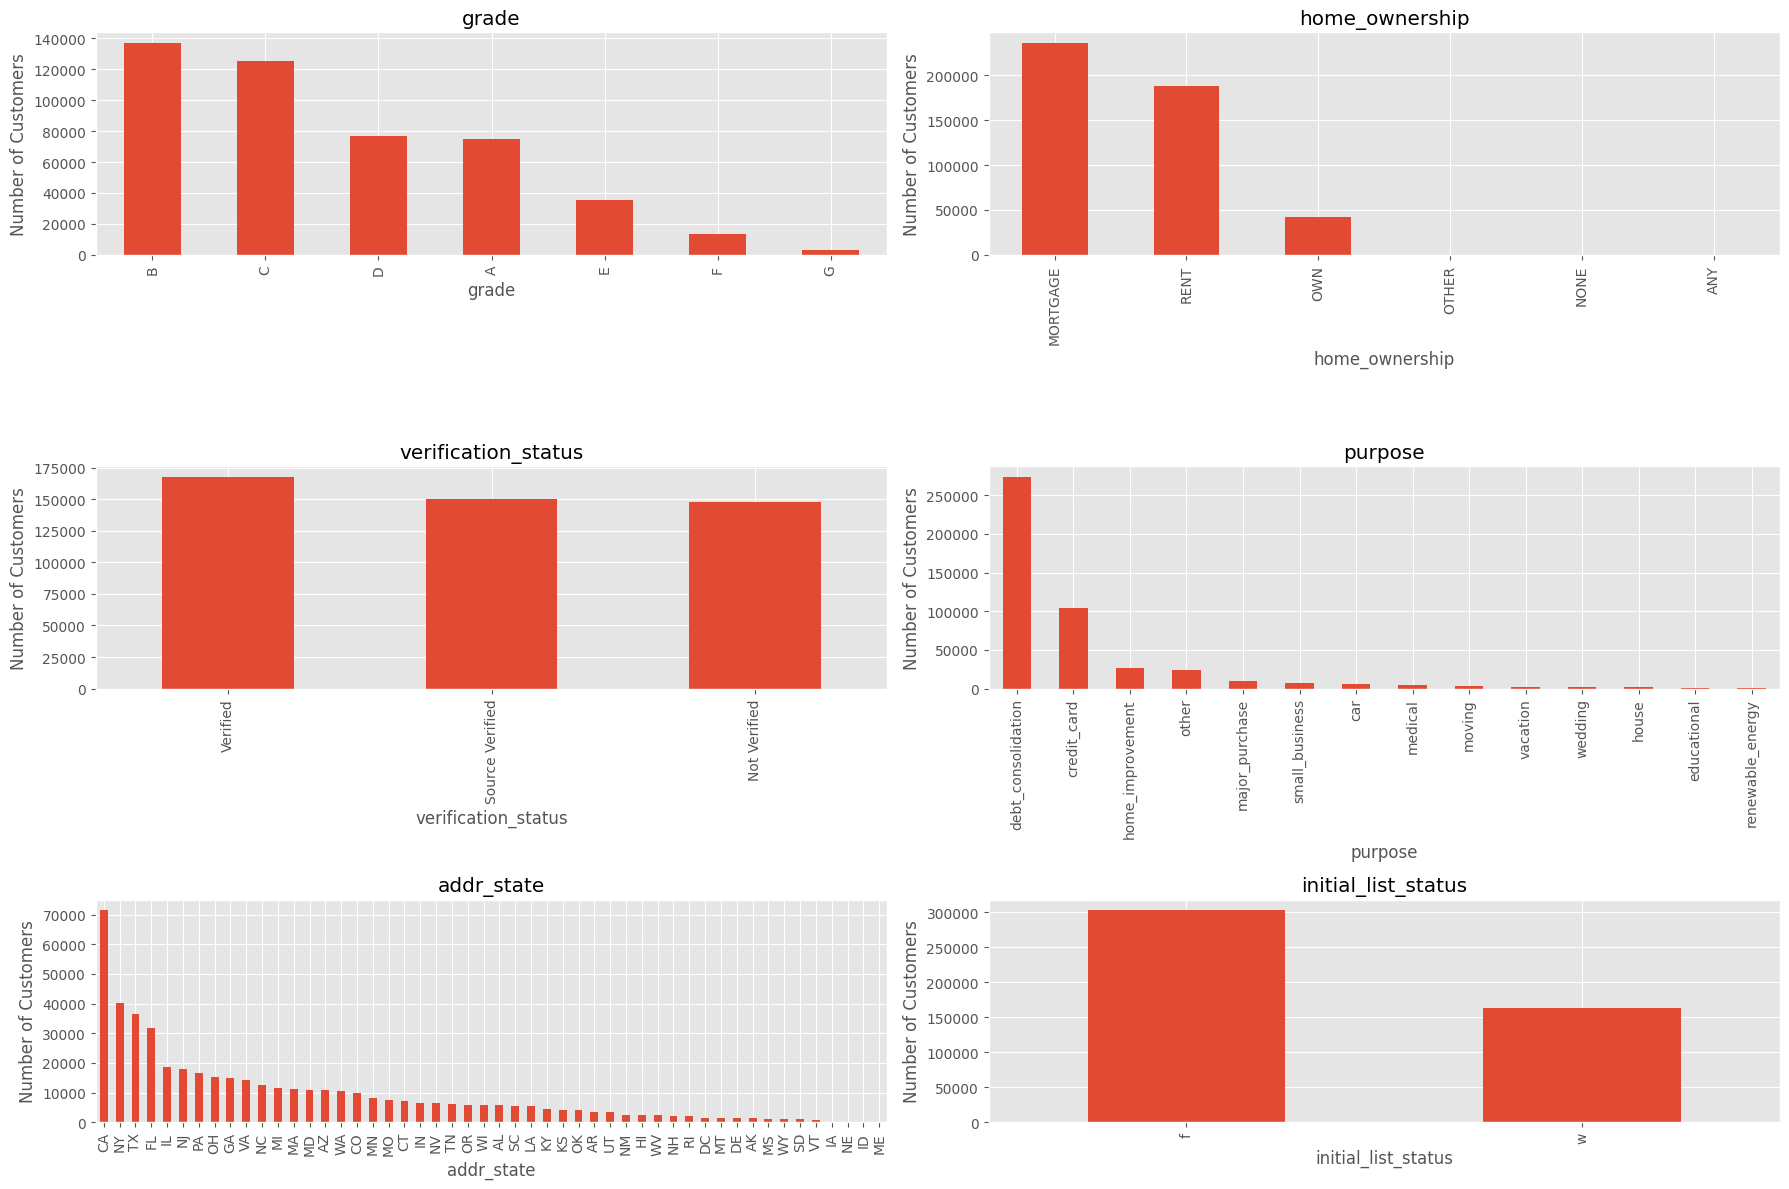

In [257]:
cat_dat = df.select_dtypes(include='object').columns
print(cat_dat)

plt.style.use('ggplot')

# number col and row for grid
n_cols = 2
n_rows = (len(cat_dat) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, column in enumerate(cat_dat):
    ax = axes[idx]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Customers')
    ax.set_title(column)

# Remove any empty subplots
for idx in range(len(cat_dat), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Numerical Data

In [258]:
num_dat = df.select_dtypes(include=np.number)
num_dat.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_loan,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,...,0.00,171.62,0.0,0.0,0,365.0,48.0,12.0,NaN,0.0
1,2500,2500,2500.0,60,15.27,59.83,0.0,30000.0,1.00,0.0,...,1.11,119.66,0.0,0.0,1,197.0,48.0,32.0,NaN,27.0
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,...,0.00,649.91,0.0,0.0,0,167.0,48.0,19.0,NaN,0.0
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,...,0.00,357.48,0.0,0.0,0,235.0,48.0,12.0,NaN,12.0
4,3000,3000,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,...,0.00,67.79,0.0,0.0,0,236.0,48.0,0.0,95.0,0.0


Ringkasan Statistik loan_amnt
Rata-rata :  14317.28
Median :  12000.00
Standar Deviasi :  8286.51
Modus :  10000


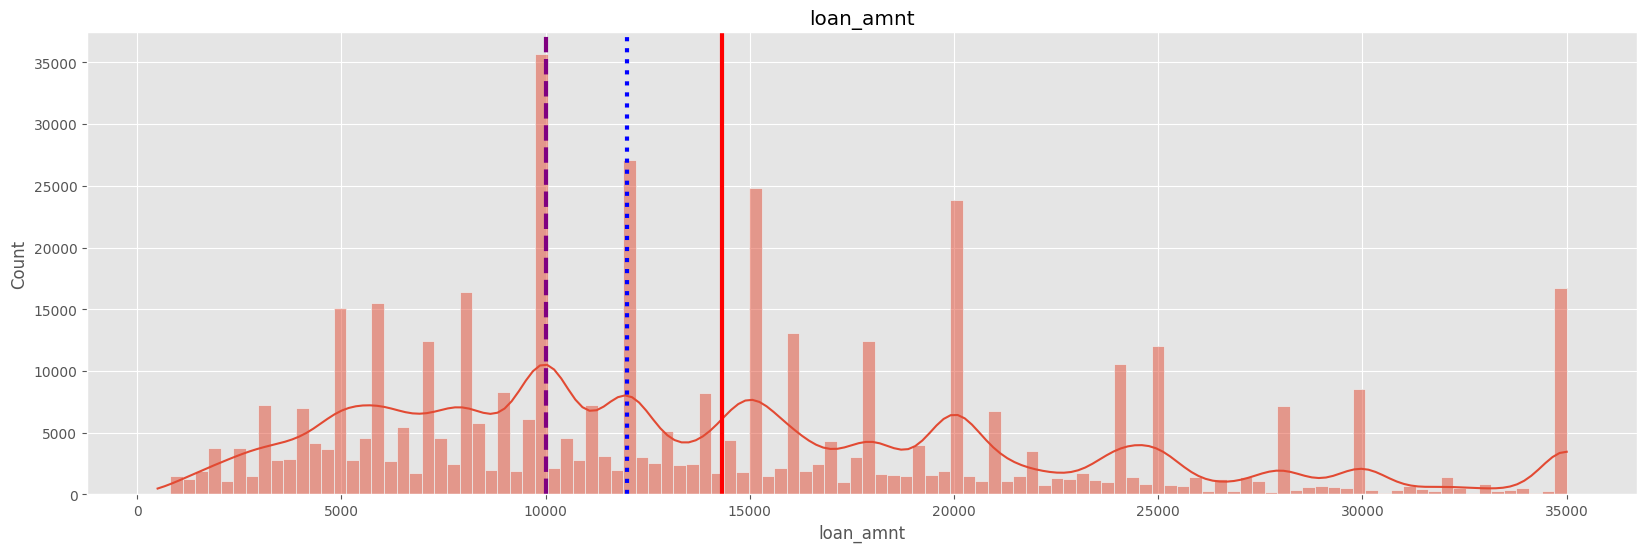



Ringkasan Statistik funded_amnt
Rata-rata :  14291.80
Median :  12000.00
Standar Deviasi :  8274.37
Modus :  10000


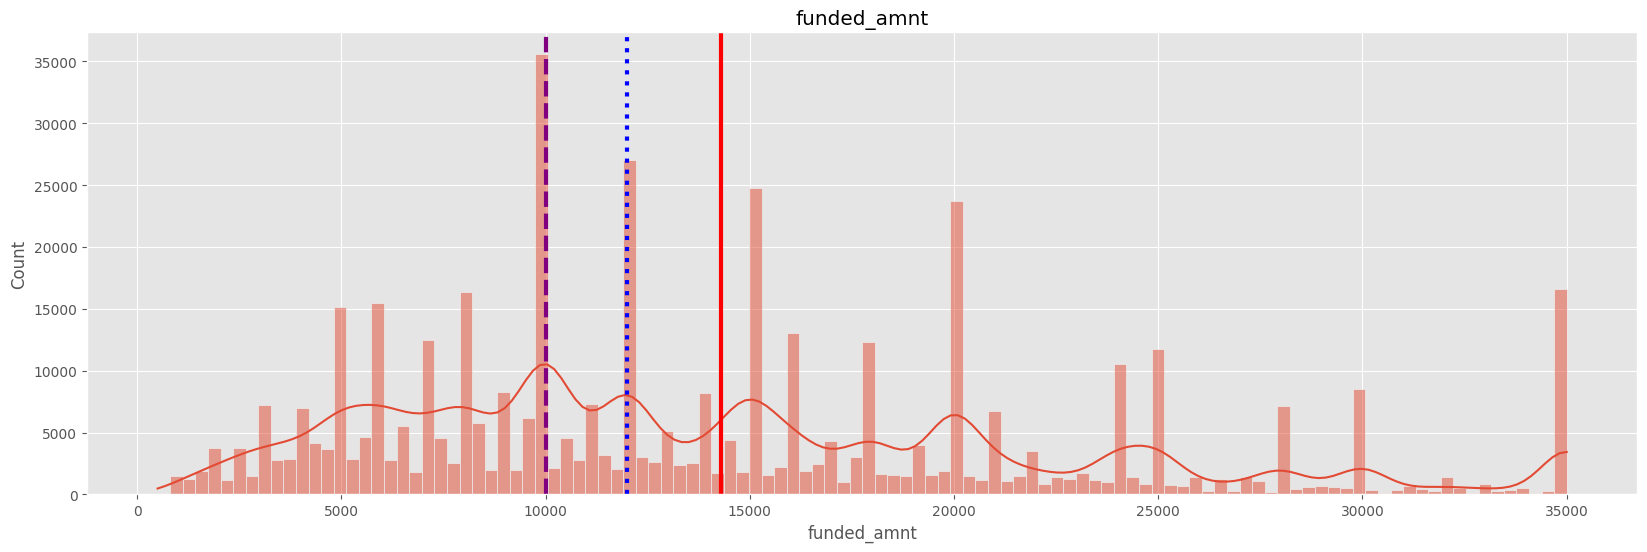



Ringkasan Statistik funded_amnt_inv
Rata-rata :  14222.33
Median :  12000.00
Standar Deviasi :  8297.64
Modus :  10000.0


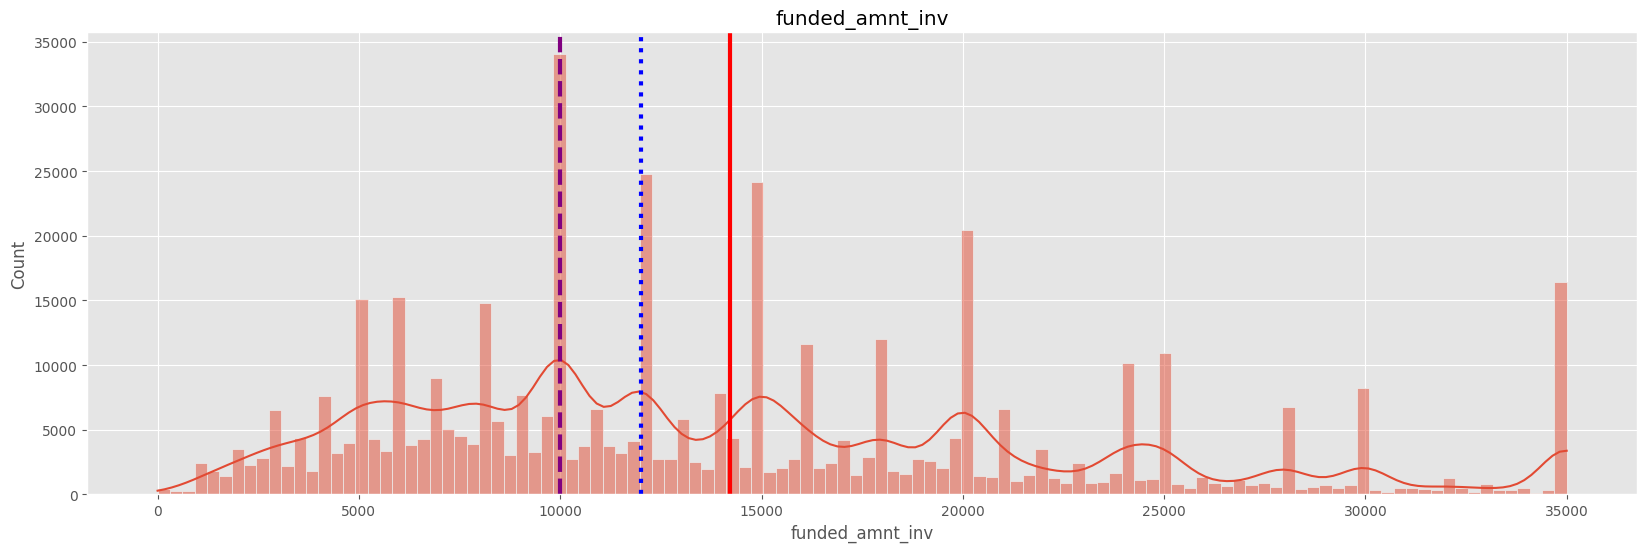



Ringkasan Statistik term
Rata-rata :  42.61
Median :  36.00
Standar Deviasi :  10.72
Modus :  36


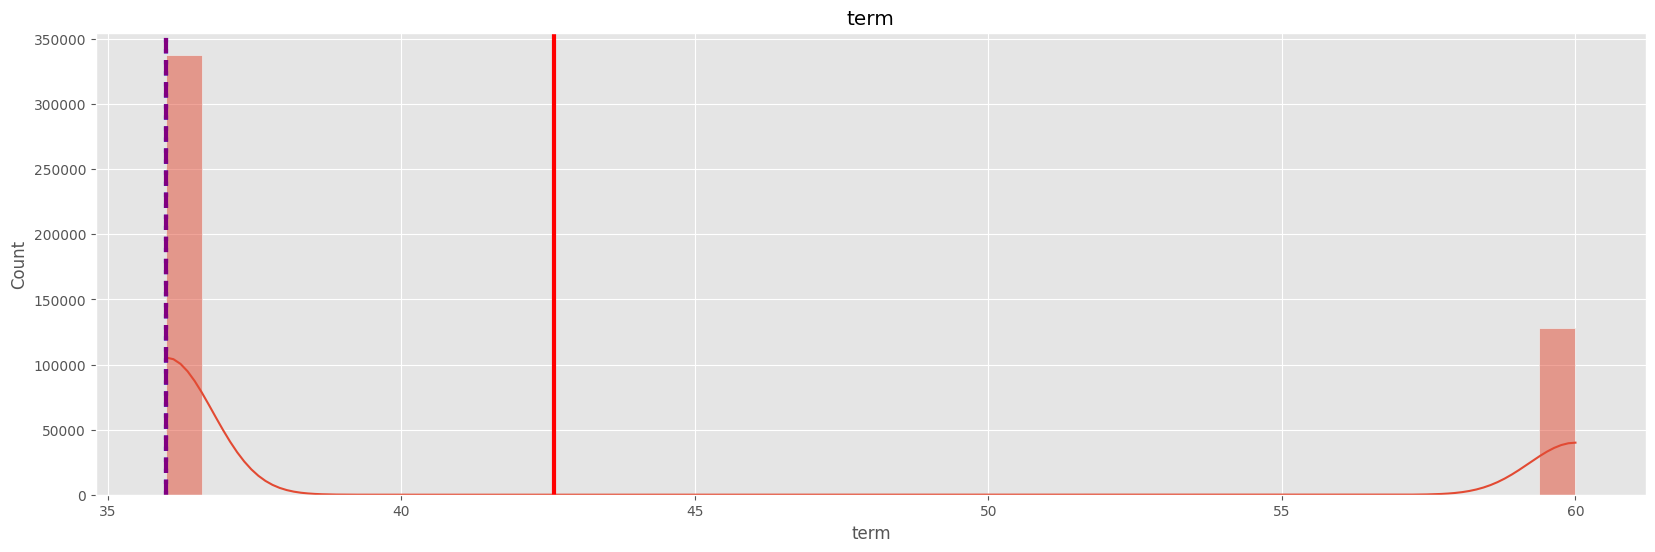



Ringkasan Statistik int_rate
Rata-rata :  13.83
Median :  13.66
Standar Deviasi :  4.36
Modus :  12.99


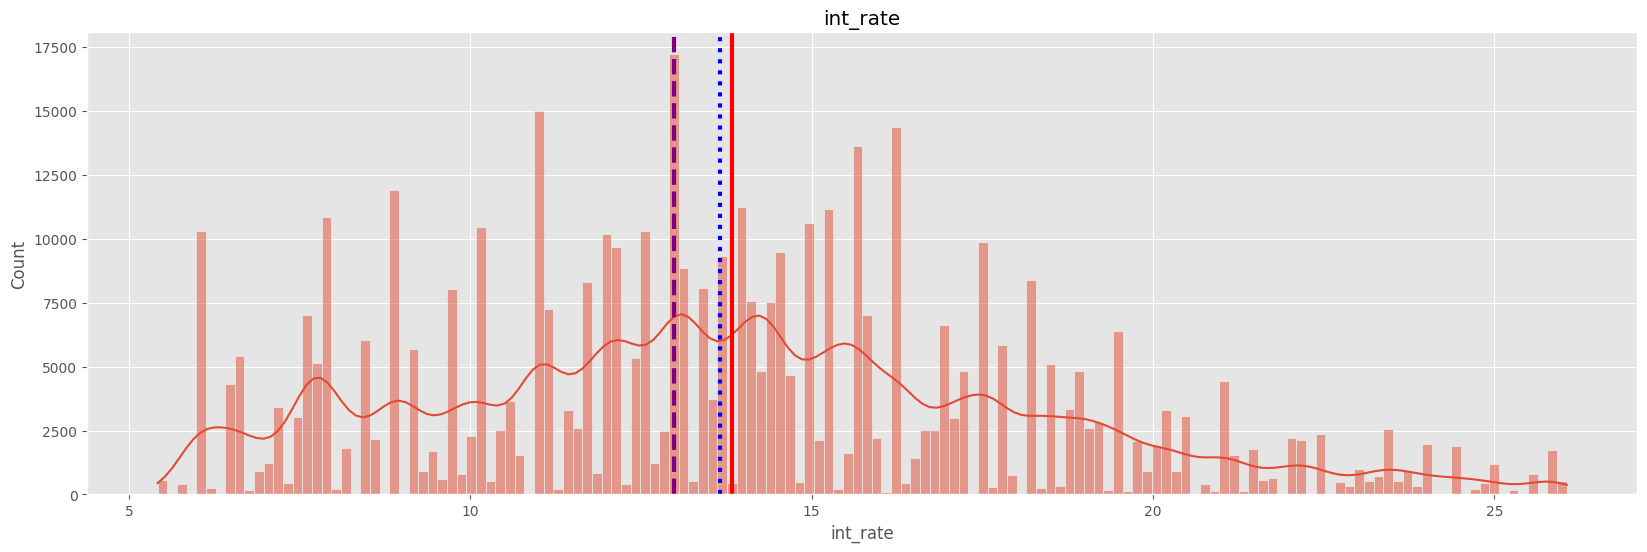



Ringkasan Statistik installment
Rata-rata :  432.06
Median :  379.89
Standar Deviasi :  243.49
Modus :  327.34


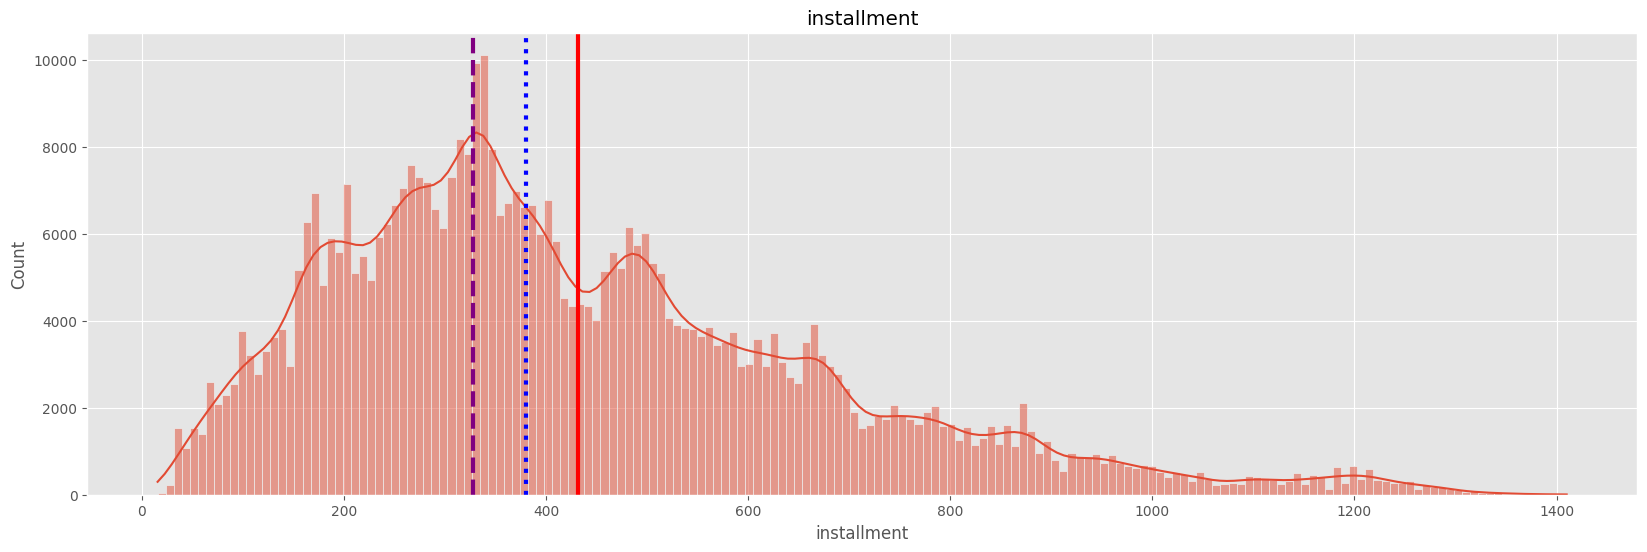



Ringkasan Statistik emp_length
Rata-rata :  5.72
Median :  6.00
Standar Deviasi :  3.76
Modus :  10.0


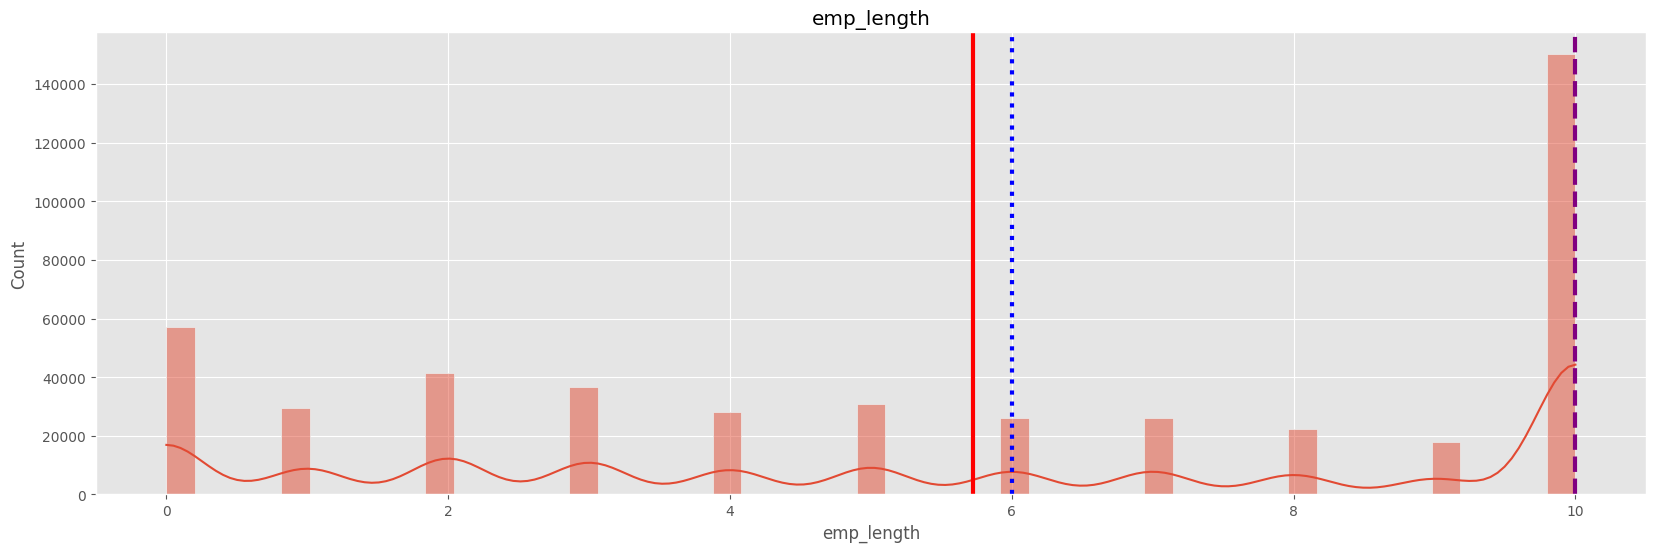



Ringkasan Statistik annual_inc
Rata-rata :  73277.38
Median :  63000.00
Standar Deviasi :  54963.57
Modus :  60000.0


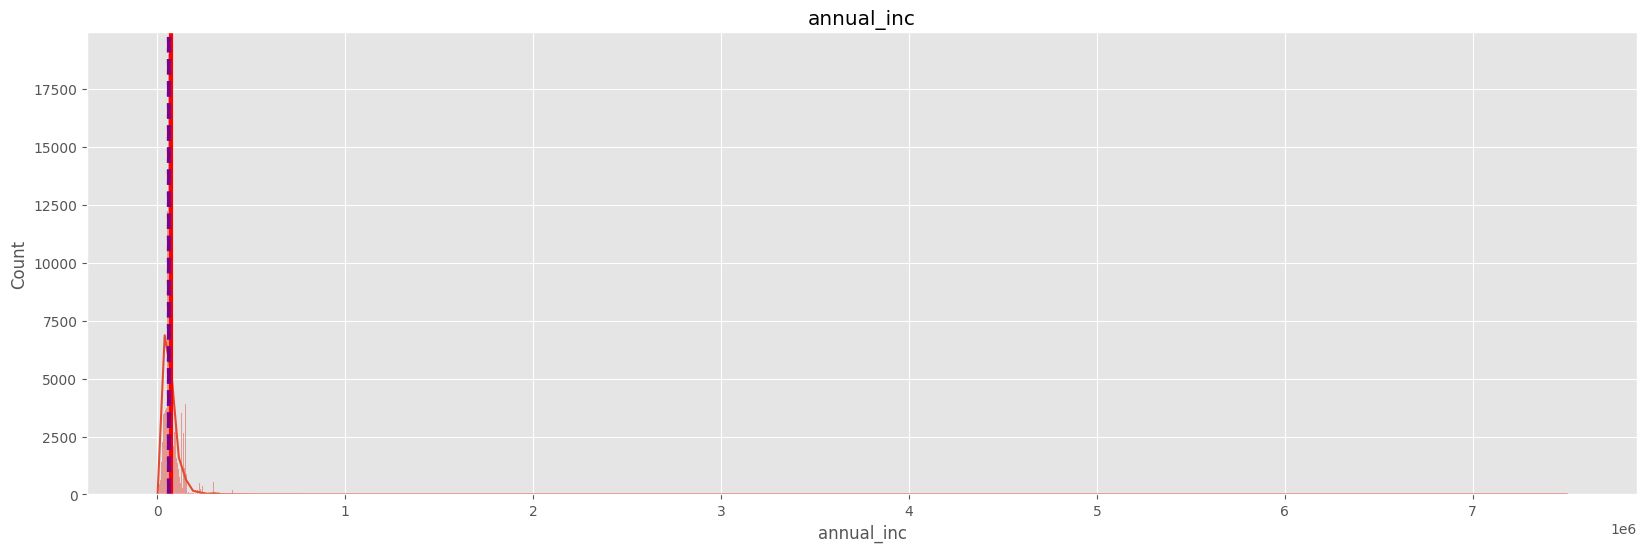



Ringkasan Statistik dti
Rata-rata :  17.22
Median :  16.87
Standar Deviasi :  7.85
Modus :  14.4


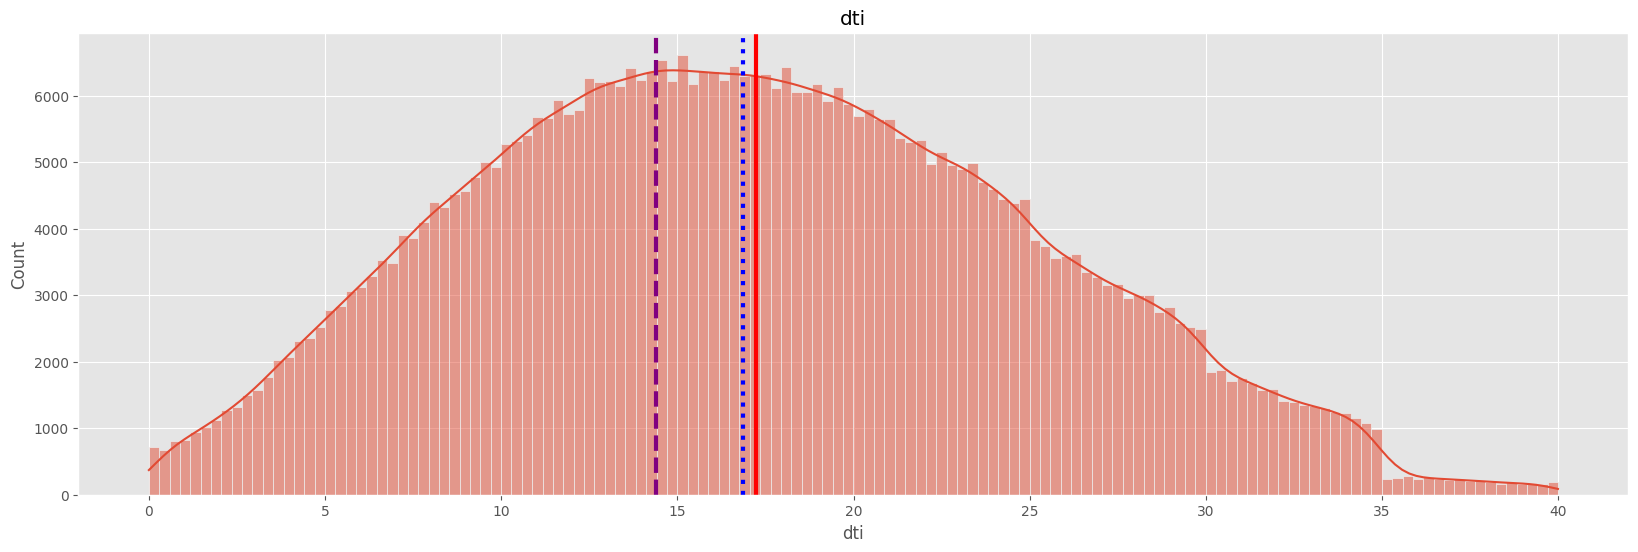



Ringkasan Statistik delinq_2yrs
Rata-rata :  0.28
Median :  0.00
Standar Deviasi :  0.80
Modus :  0.0


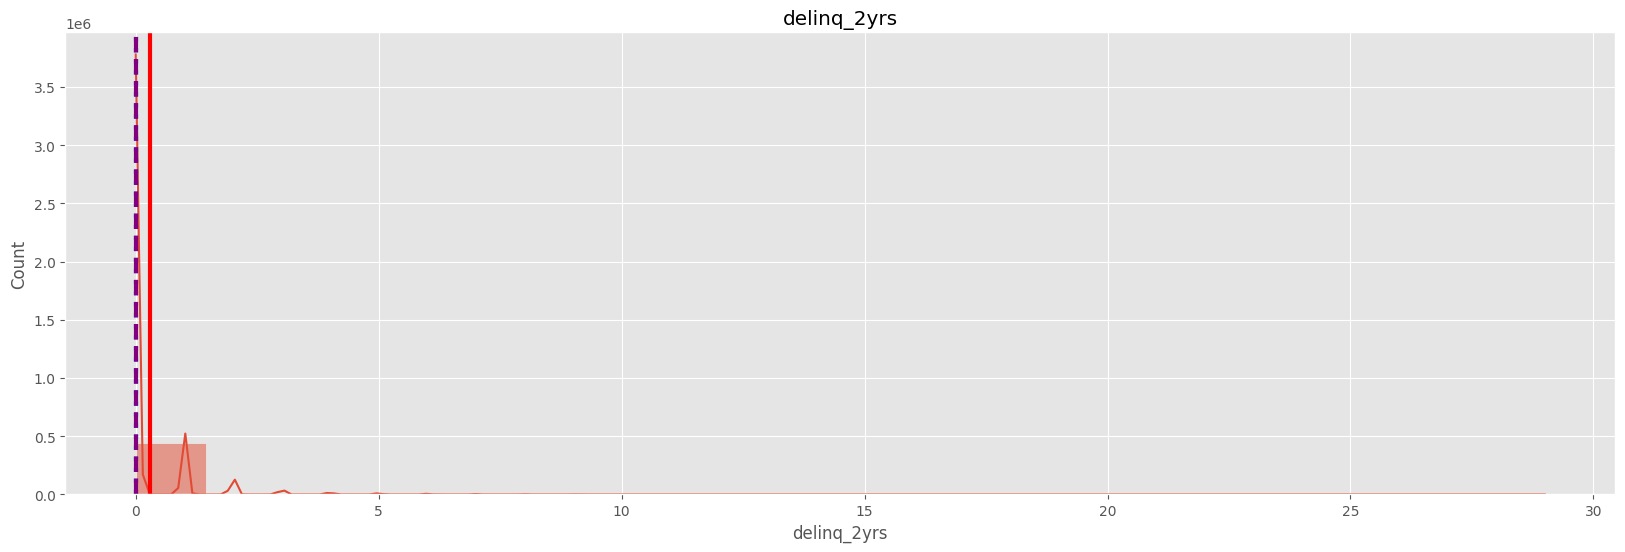



Ringkasan Statistik inq_last_6mths
Rata-rata :  0.80
Median :  0.00
Standar Deviasi :  1.09
Modus :  0.0


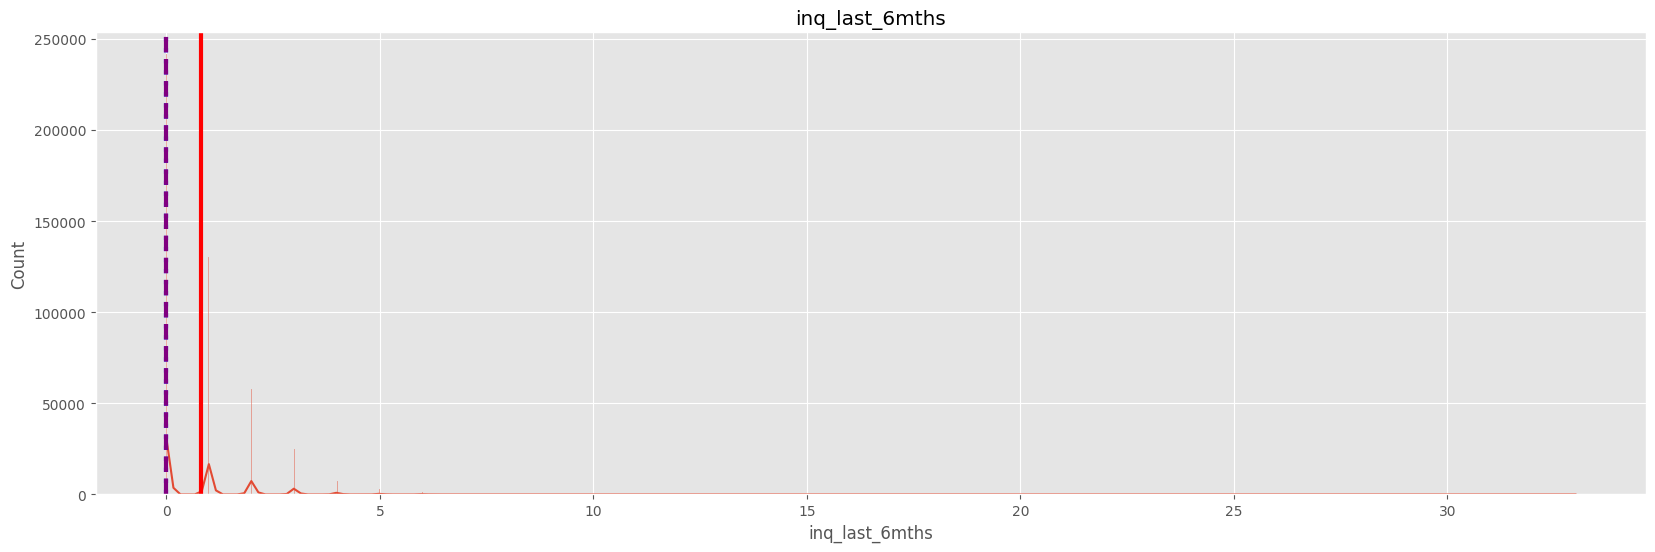



Ringkasan Statistik mths_since_last_delinq
Rata-rata :  34.10
Median :  31.00
Standar Deviasi :  21.78
Modus :  9.0


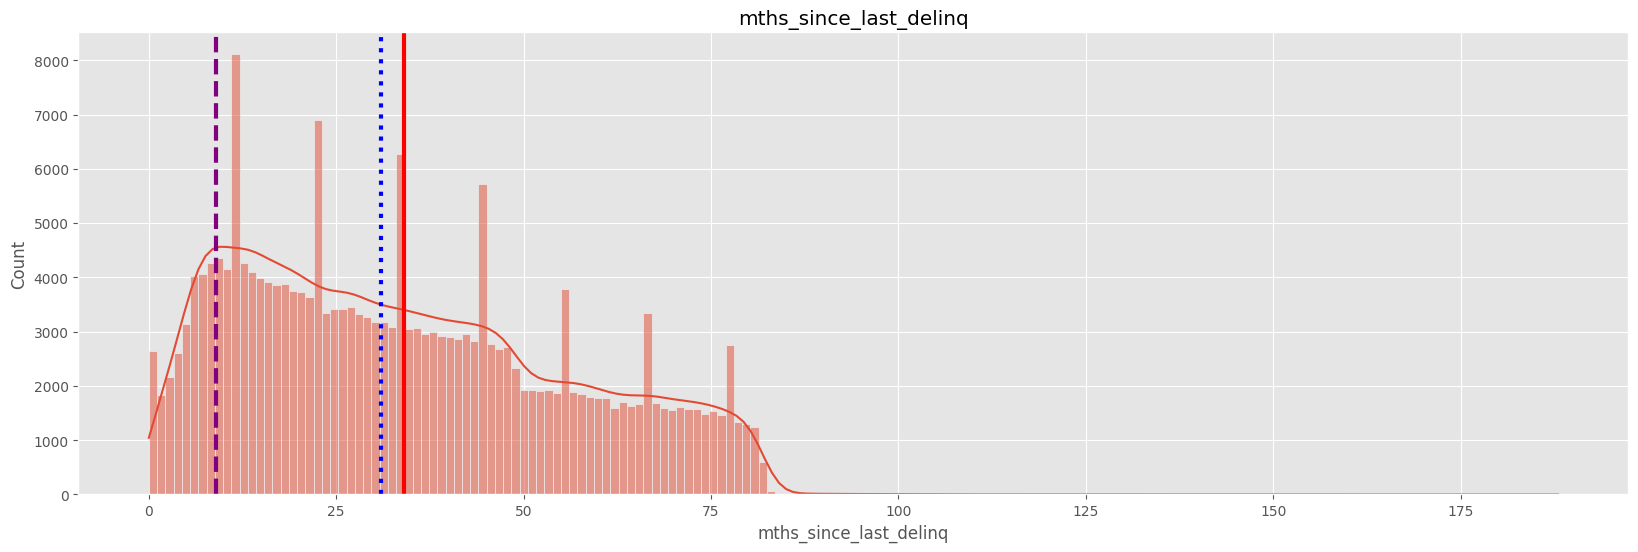



Ringkasan Statistik mths_since_last_record
Rata-rata :  74.31
Median :  76.00
Standar Deviasi :  30.36
Modus :  0.0


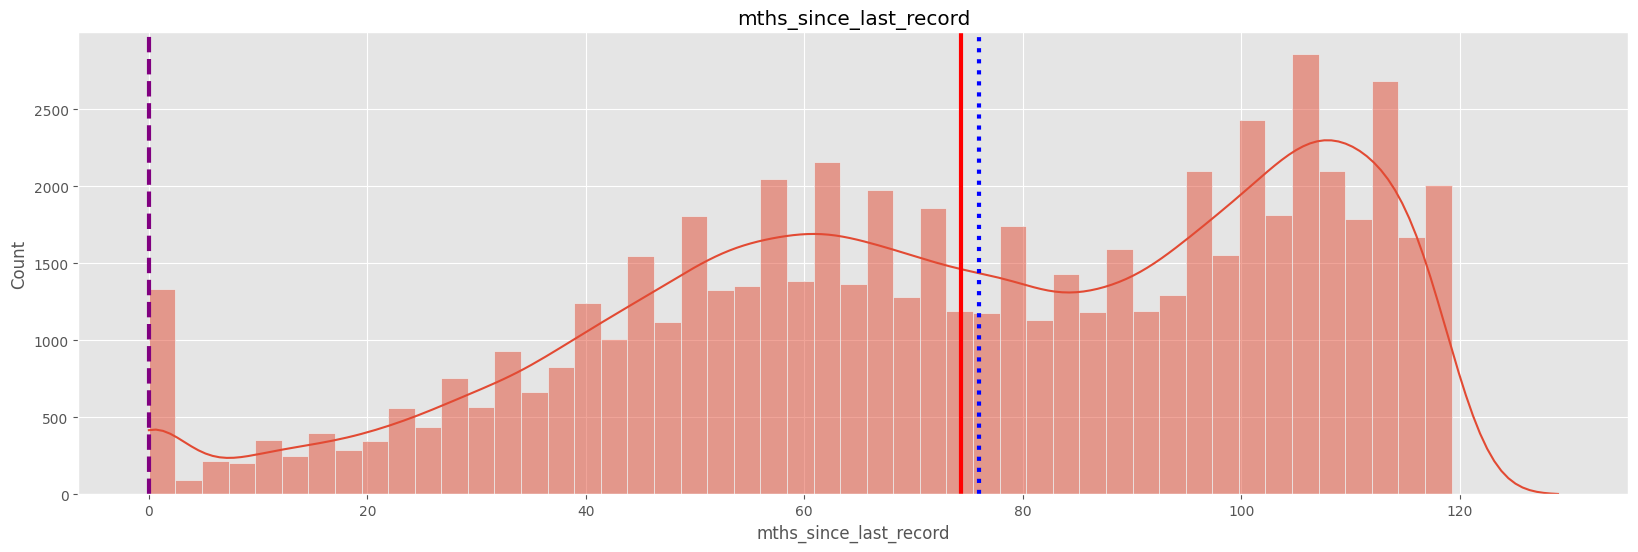



Ringkasan Statistik open_acc
Rata-rata :  11.19
Median :  10.00
Standar Deviasi :  4.99
Modus :  9.0


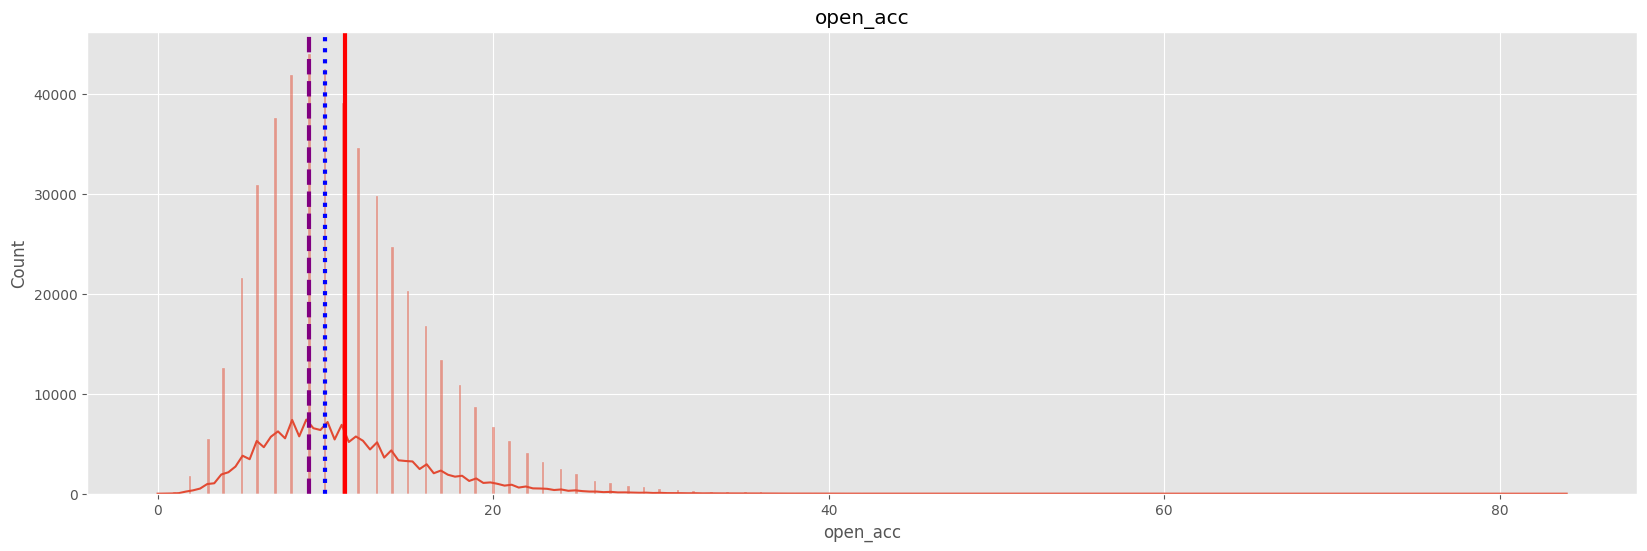



Ringkasan Statistik pub_rec
Rata-rata :  0.16
Median :  0.00
Standar Deviasi :  0.51
Modus :  0.0


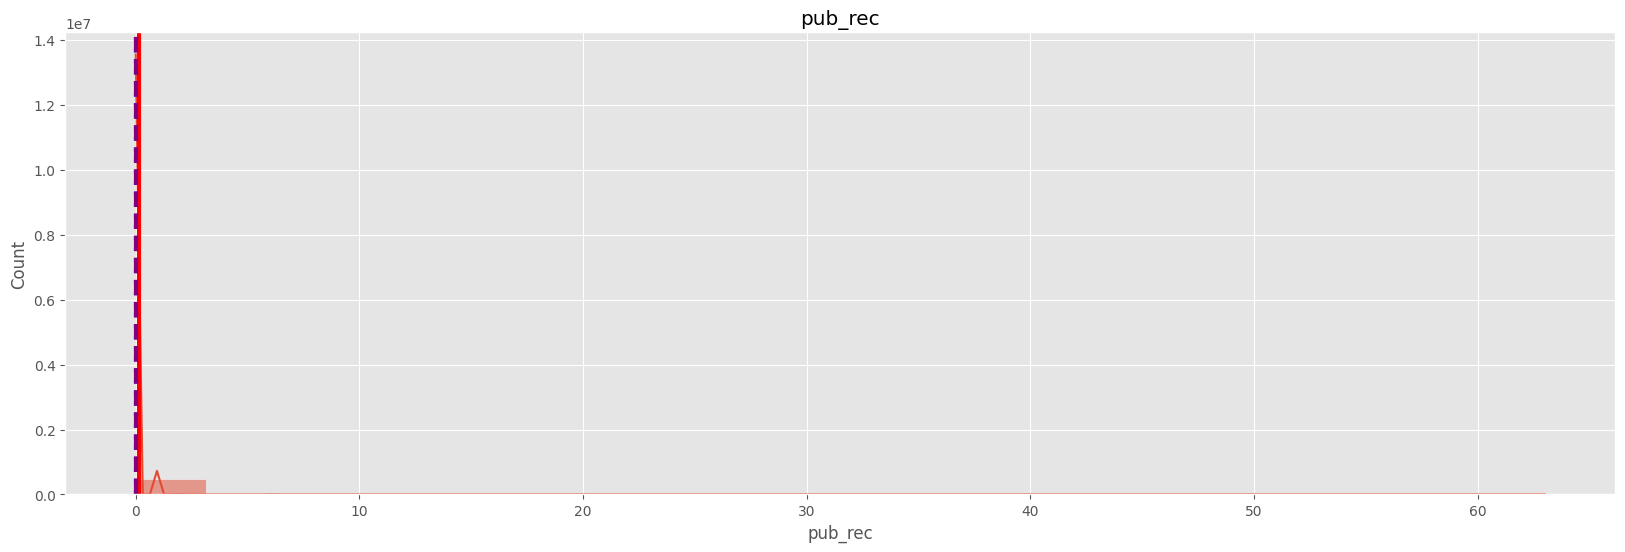



Ringkasan Statistik revol_bal
Rata-rata :  16230.20
Median :  11764.00
Standar Deviasi :  20676.25
Modus :  0


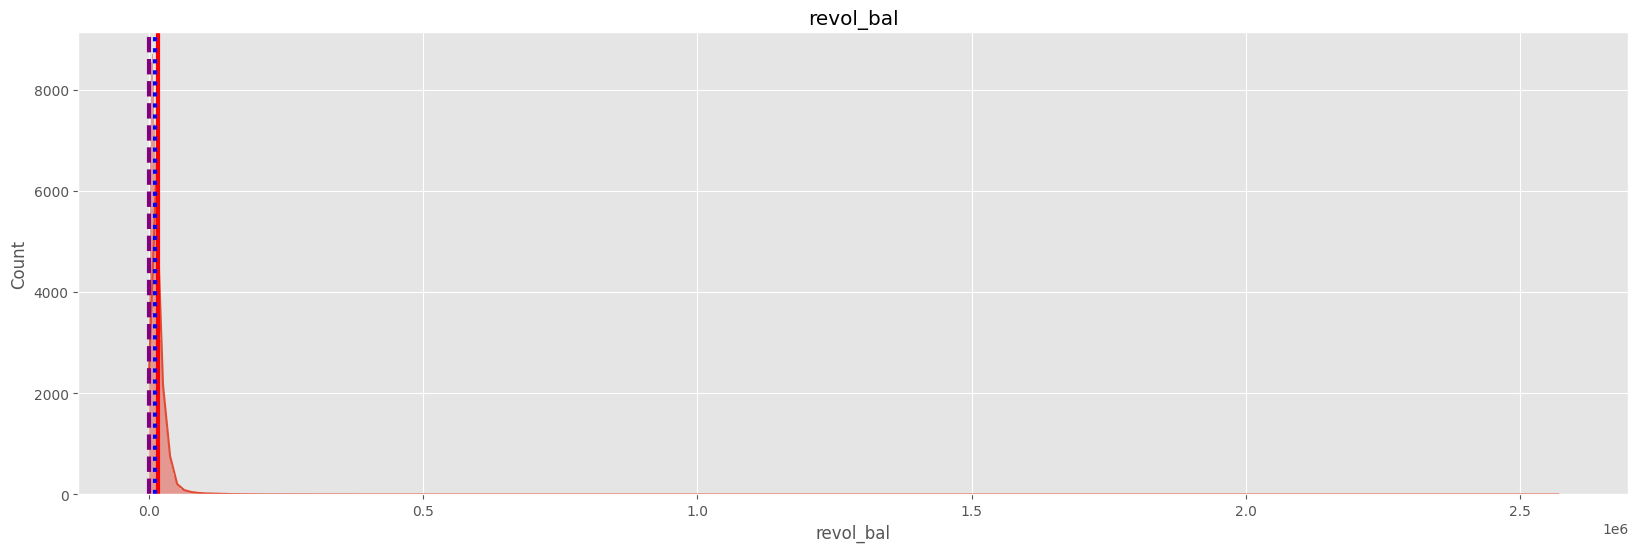



Ringkasan Statistik revol_util
Rata-rata :  56.18
Median :  57.60
Standar Deviasi :  23.73
Modus :  0.0


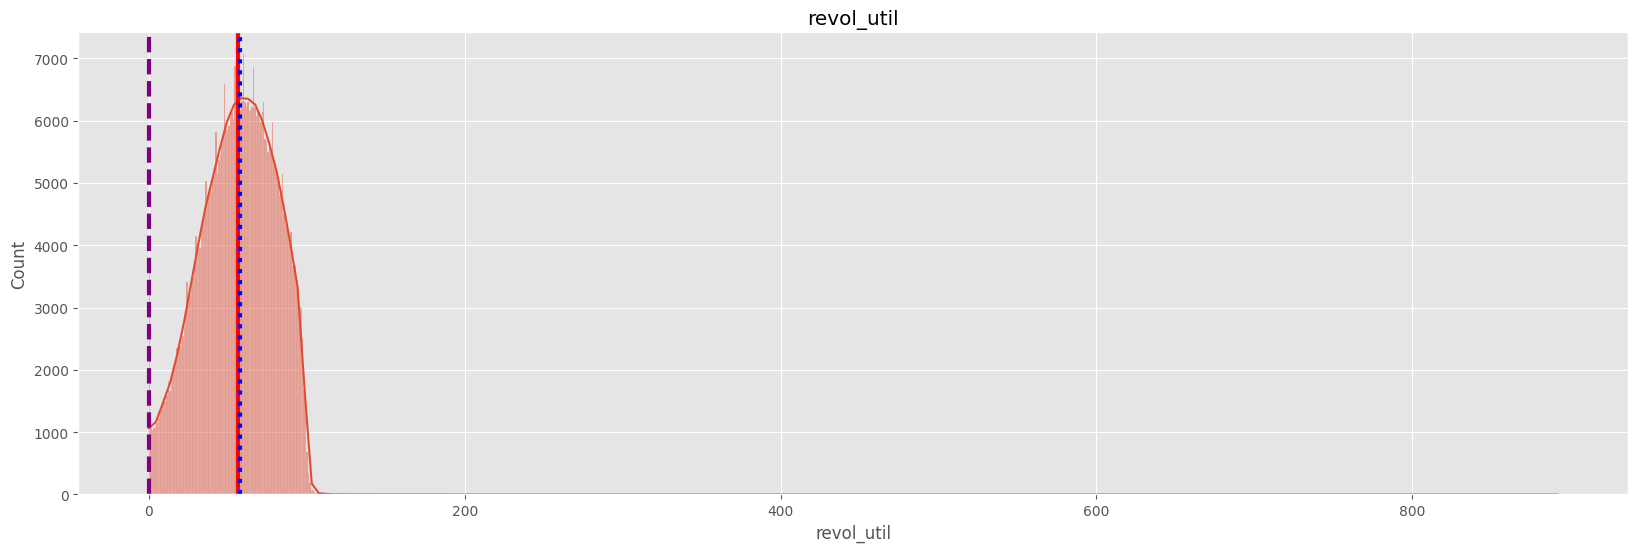



Ringkasan Statistik total_acc
Rata-rata :  25.06
Median :  23.00
Standar Deviasi :  11.60
Modus :  21.0


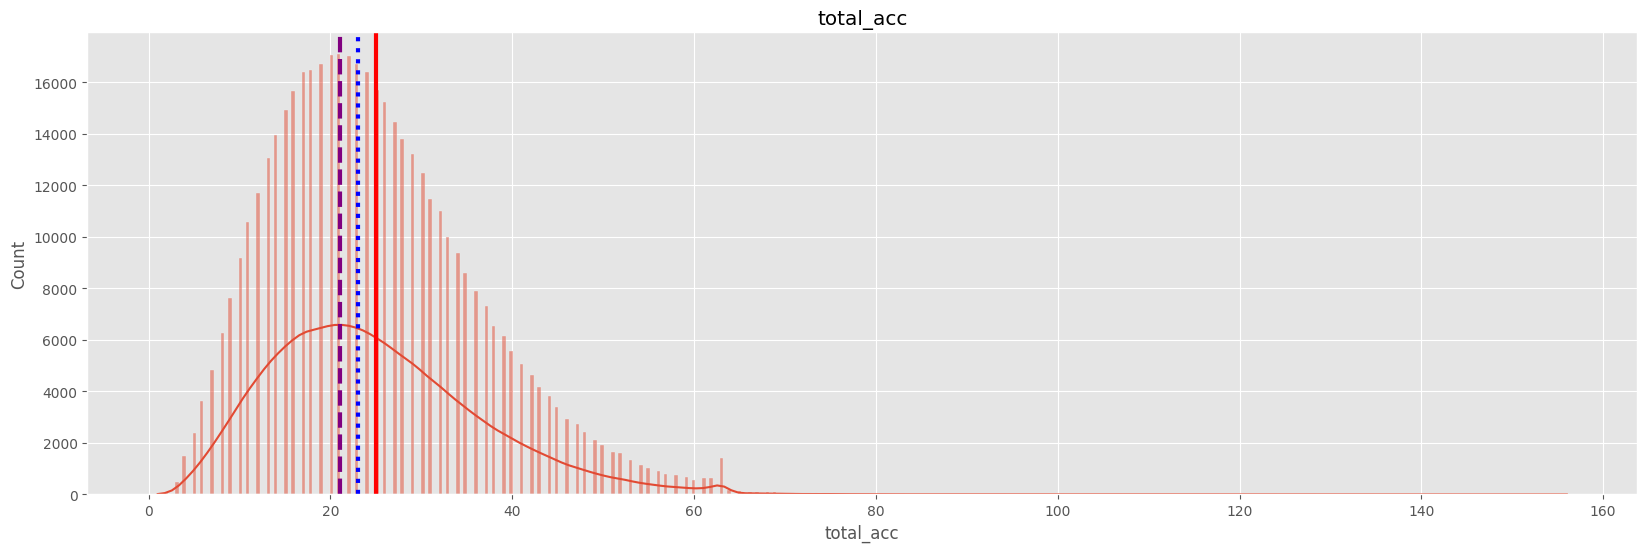



Ringkasan Statistik out_prncp
Rata-rata :  4410.06
Median :  441.47
Standar Deviasi :  6355.08
Modus :  0.0


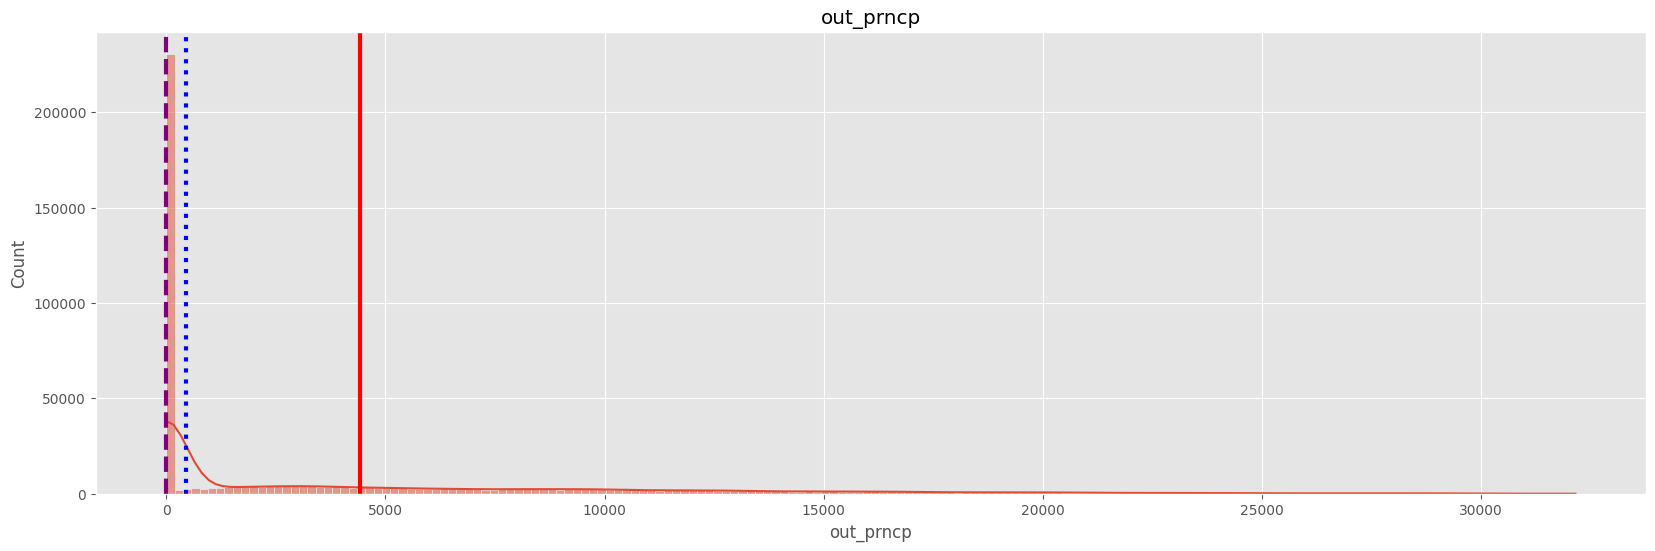



Ringkasan Statistik out_prncp_inv
Rata-rata :  4408.45
Median :  441.38
Standar Deviasi :  6353.20
Modus :  0.0


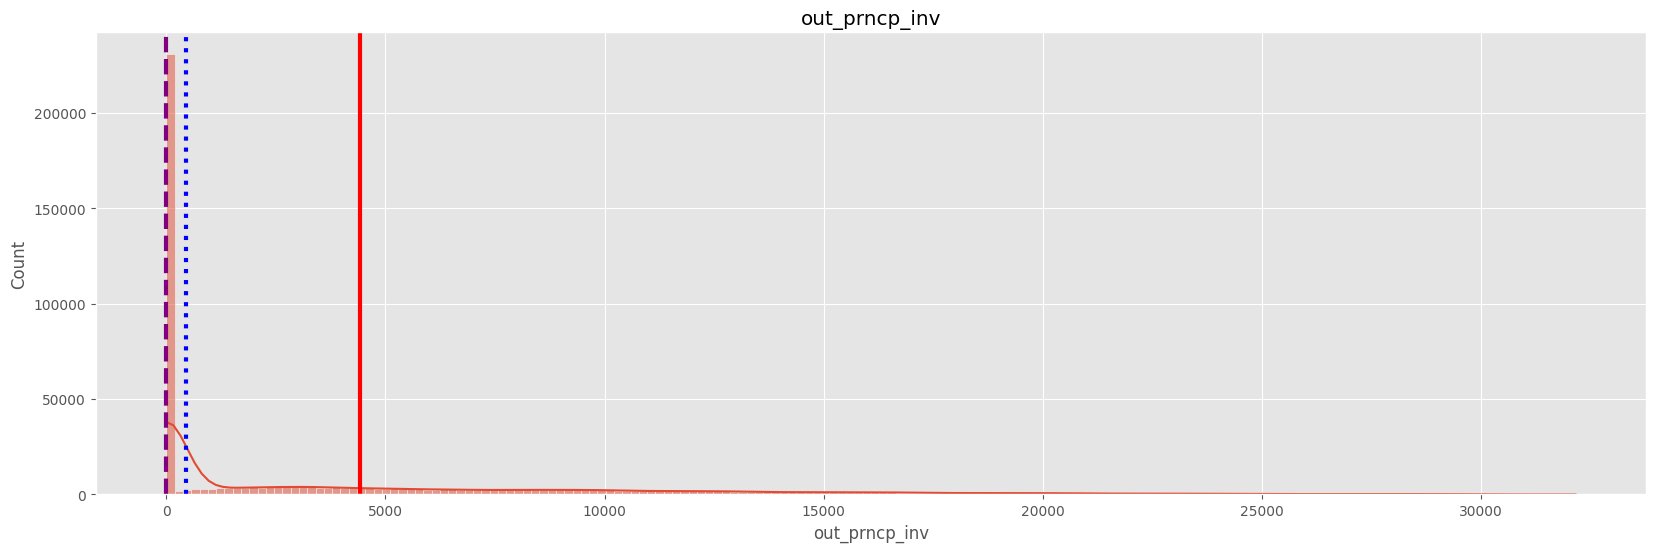



Ringkasan Statistik total_pymnt
Rata-rata :  11540.69
Median :  9419.25
Standar Deviasi :  8265.63
Modus :  6743.73


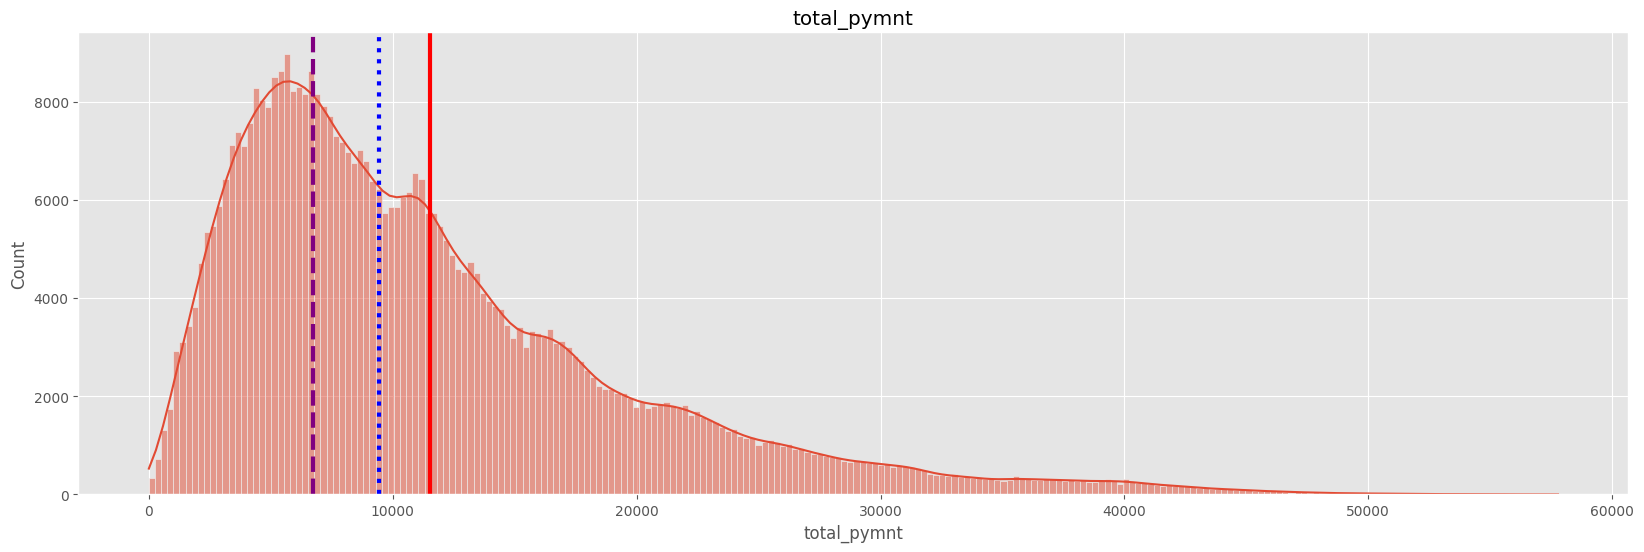



Ringkasan Statistik total_pymnt_inv
Rata-rata :  11469.89
Median :  9355.43
Standar Deviasi :  8254.16
Modus :  0.0


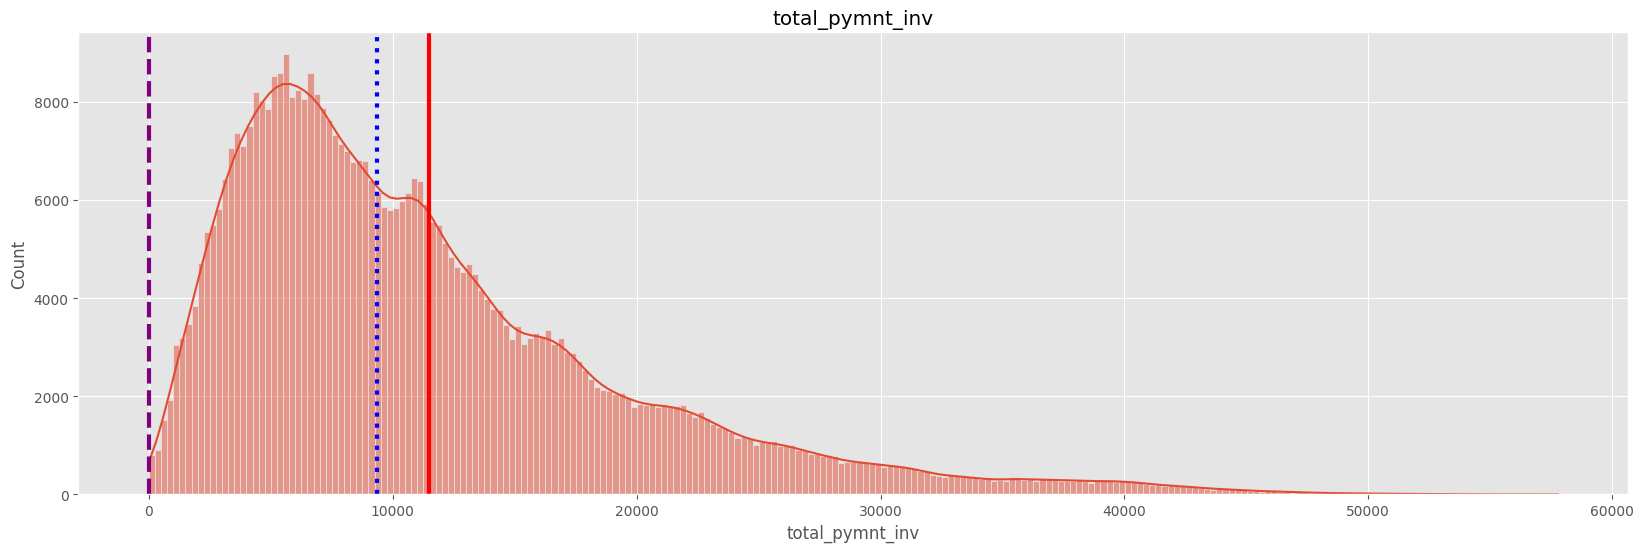



Ringkasan Statistik total_rec_prncp
Rata-rata :  8866.01
Median :  6817.76
Standar Deviasi :  7031.69
Modus :  10000.0


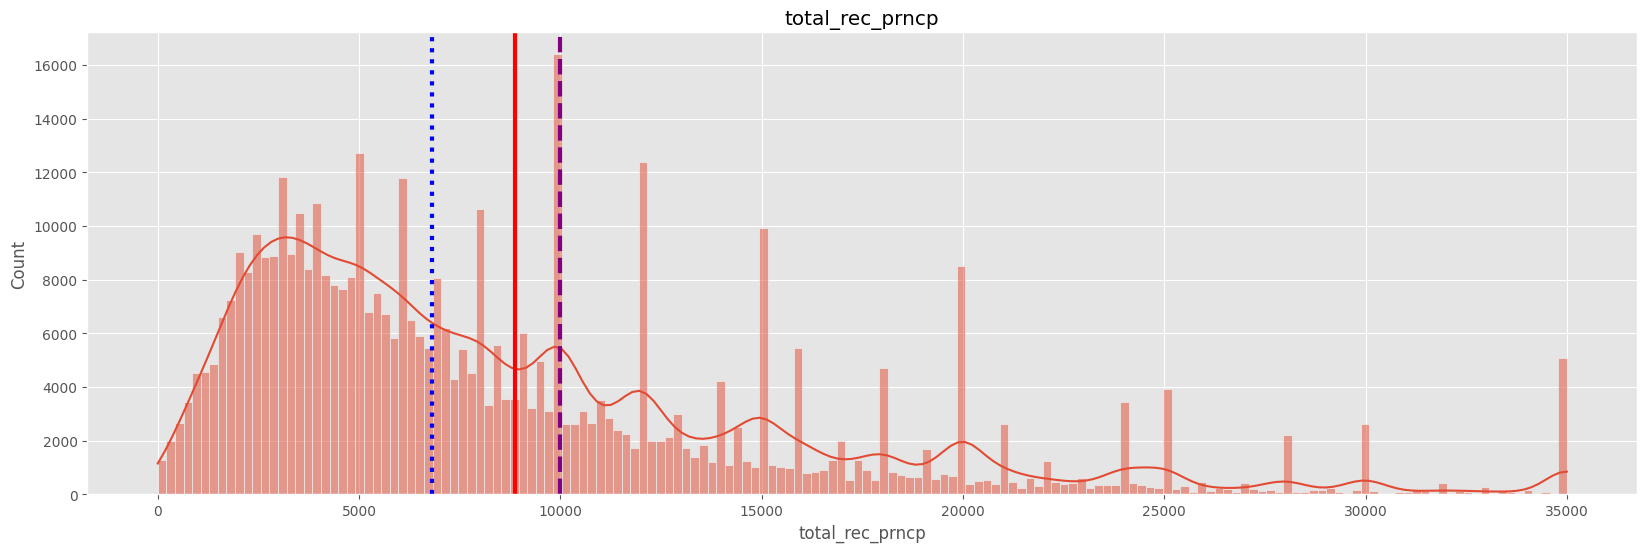



Ringkasan Statistik total_rec_int
Rata-rata :  2588.68
Median :  1818.88
Standar Deviasi :  2483.81
Modus :  0.0


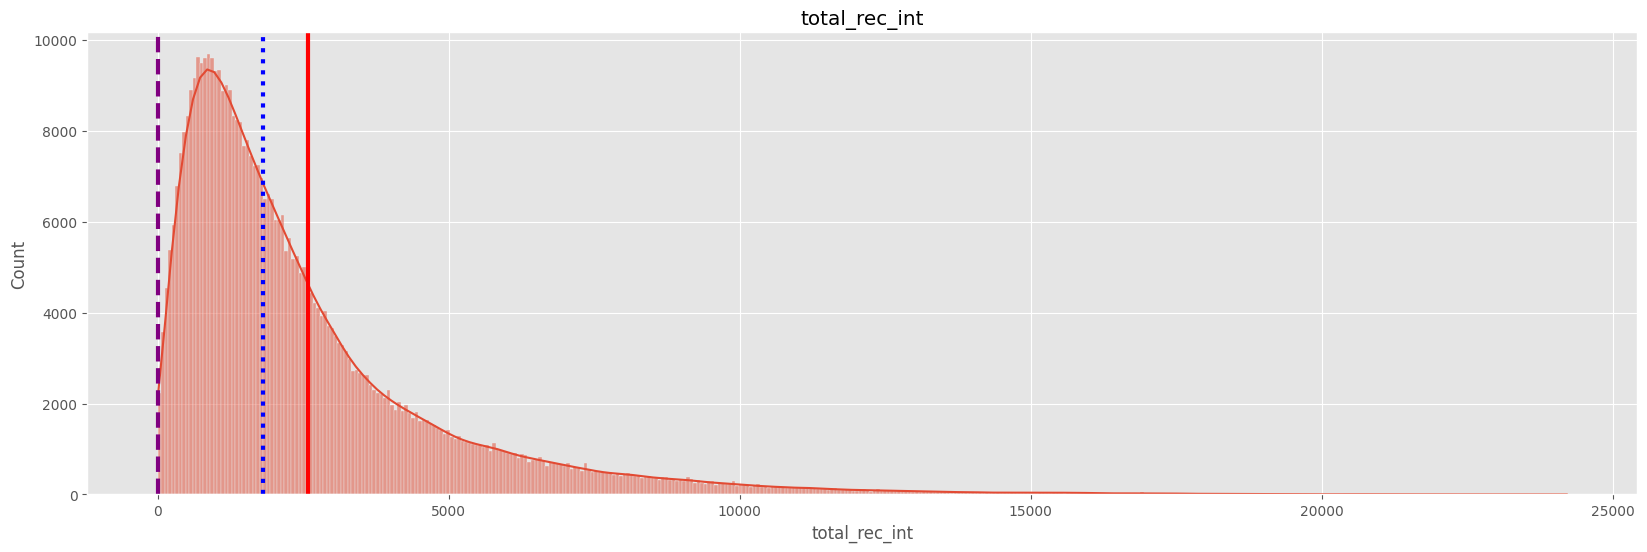



Ringkasan Statistik total_rec_late_fee
Rata-rata :  0.65
Median :  0.00
Standar Deviasi :  5.27
Modus :  0.0


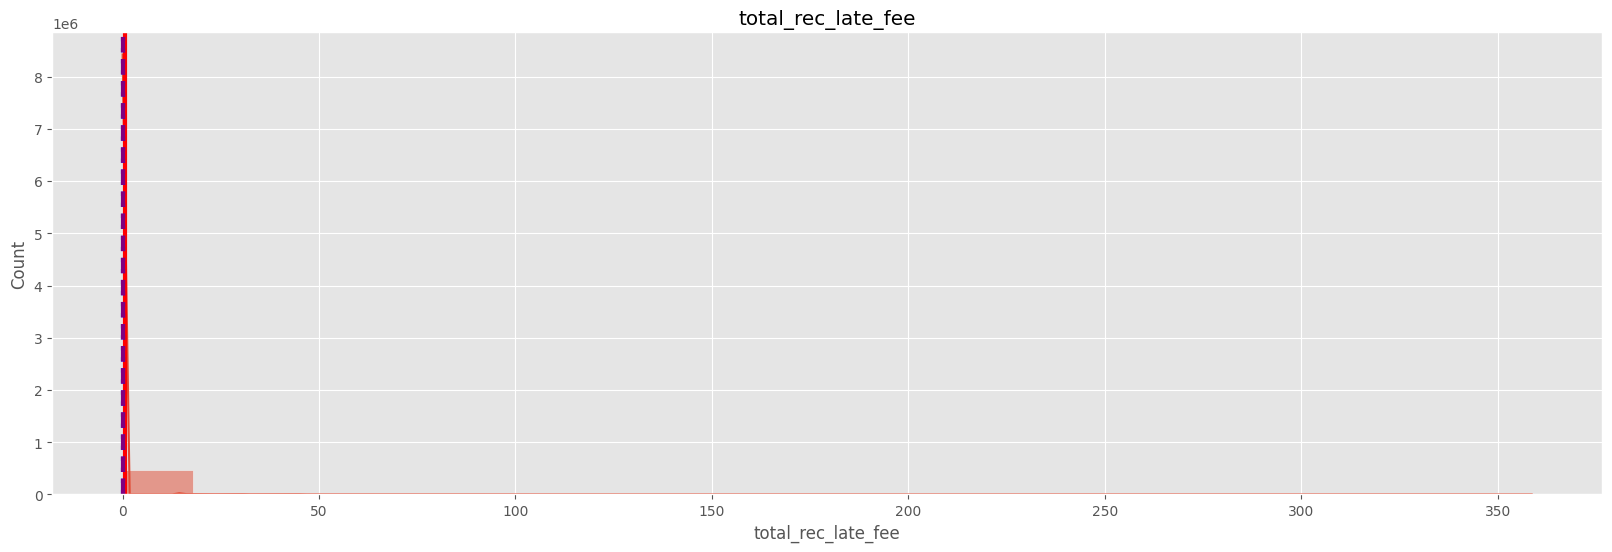



Ringkasan Statistik recoveries
Rata-rata :  85.34
Median :  0.00
Standar Deviasi :  552.22
Modus :  0.0


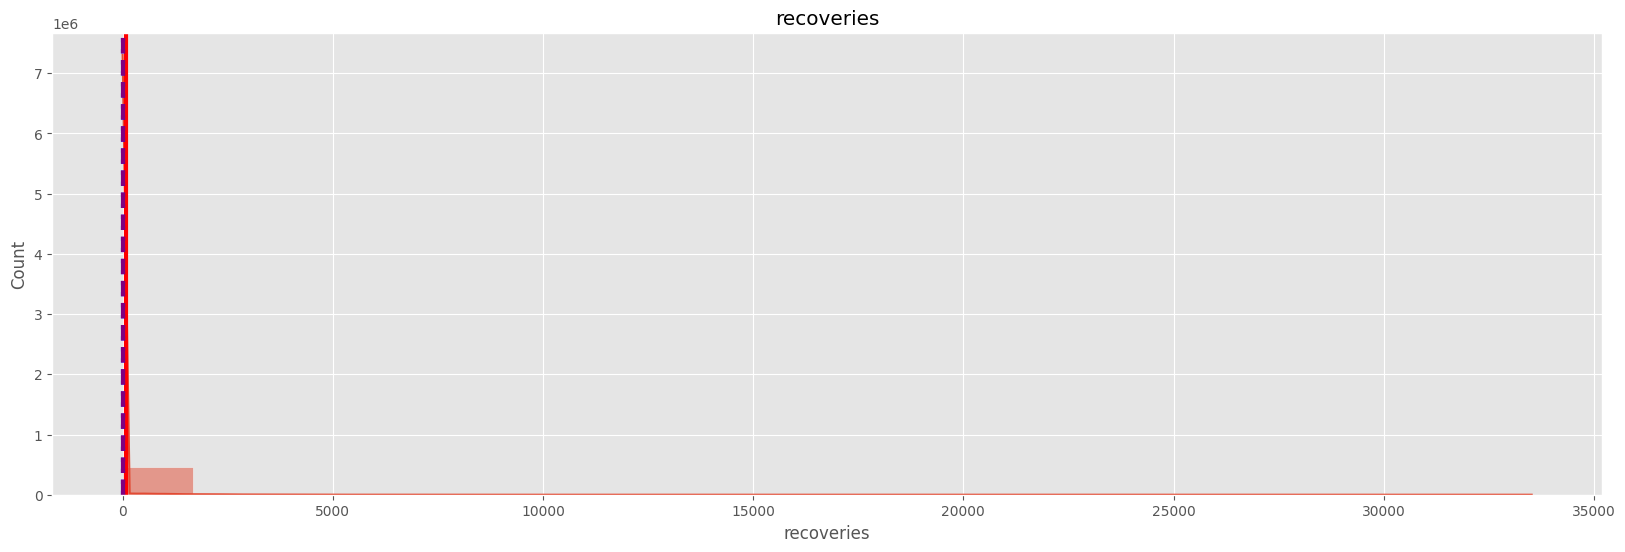



Ringkasan Statistik collection_recovery_fee
Rata-rata :  8.96
Median :  0.00
Standar Deviasi :  85.49
Modus :  0.0


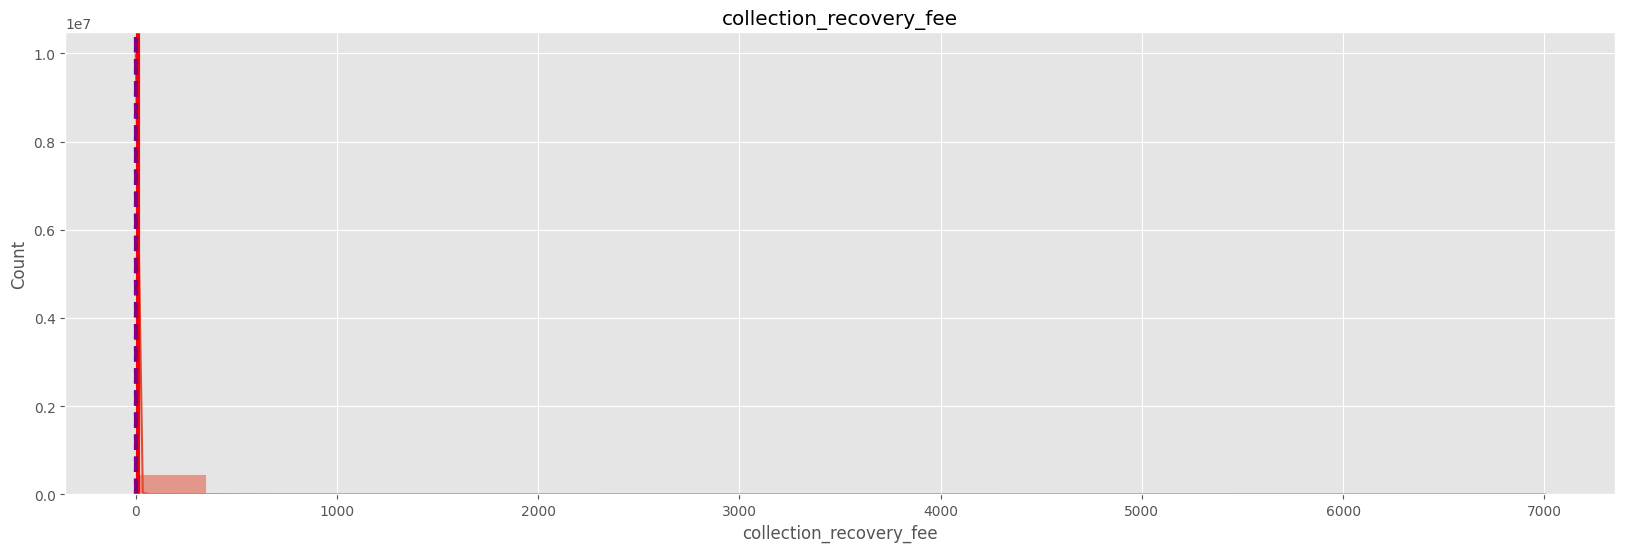



Ringkasan Statistik last_pymnt_amnt
Rata-rata :  3123.91
Median :  545.96
Standar Deviasi :  5554.74
Modus :  327.34


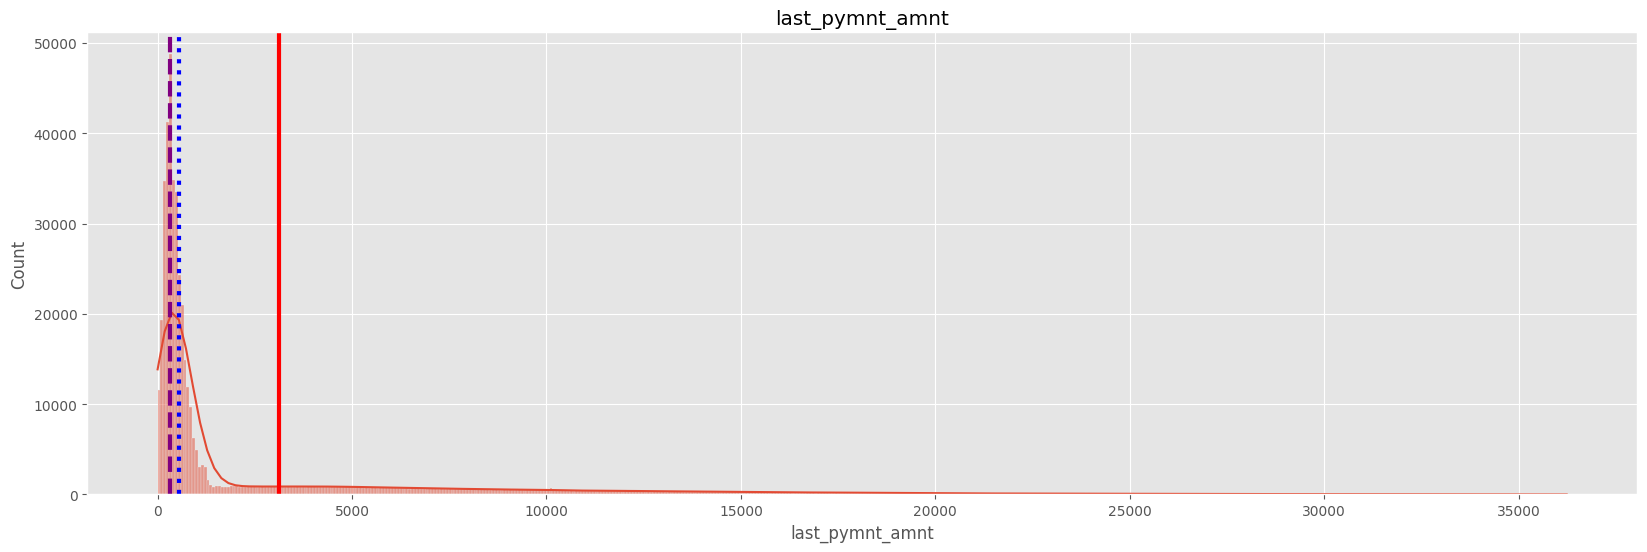



Ringkasan Statistik collections_12_mths_ex_med
Rata-rata :  0.01
Median :  0.00
Standar Deviasi :  0.11
Modus :  0.0


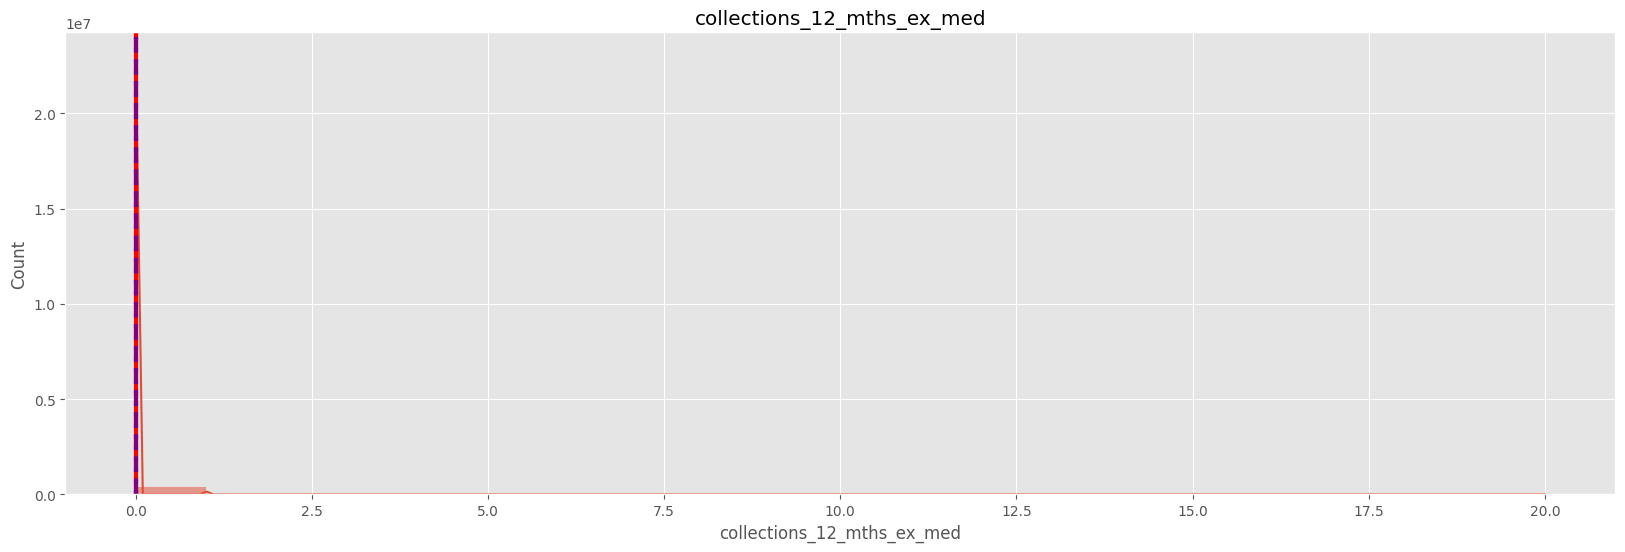



Ringkasan Statistik acc_now_delinq
Rata-rata :  0.00
Median :  0.00
Standar Deviasi :  0.07
Modus :  0.0


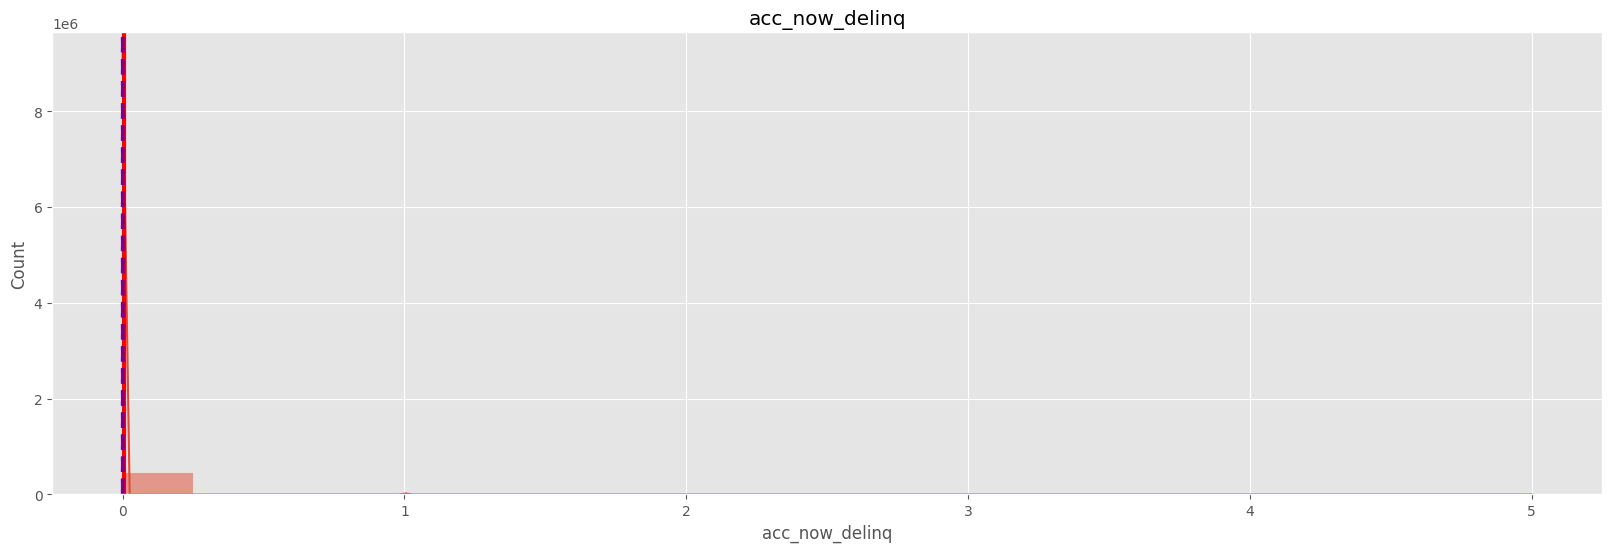



Ringkasan Statistik bad_loan
Rata-rata :  0.11
Median :  0.00
Standar Deviasi :  0.31
Modus :  0


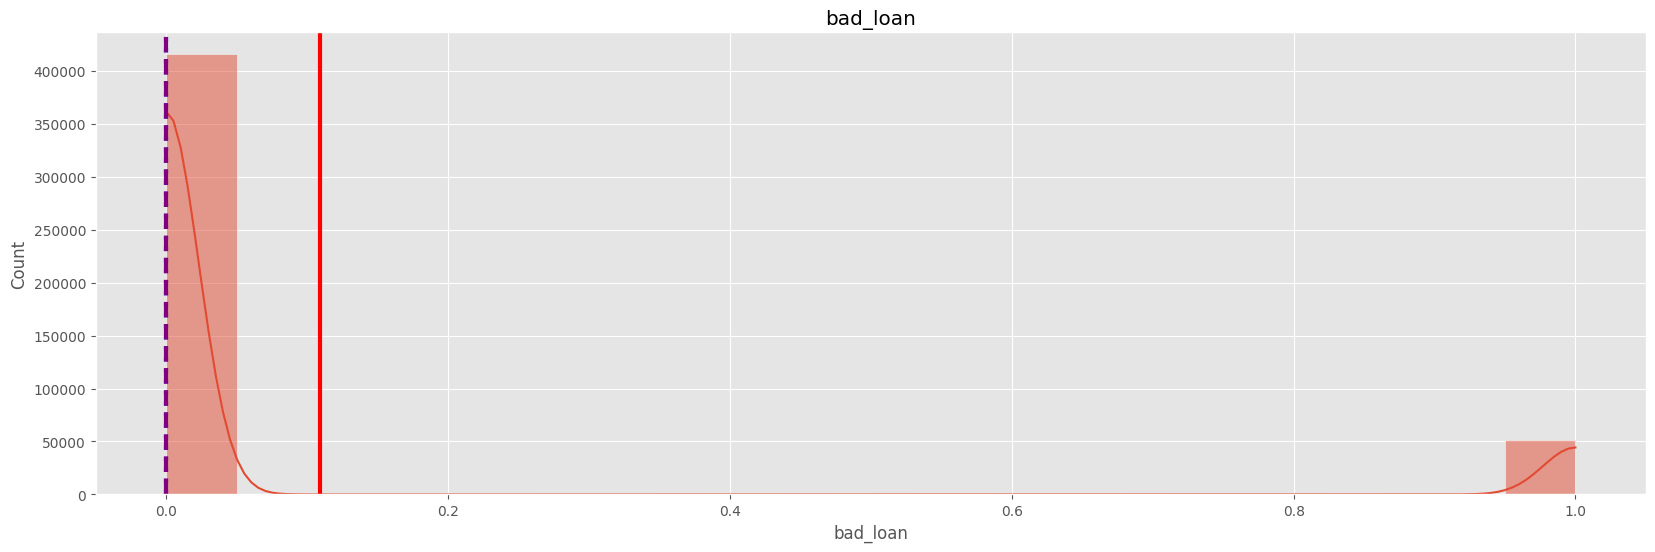



Ringkasan Statistik mths_since_earliest_cr_line
Rata-rata :  215.42
Median :  199.00
Standar Deviasi :  84.89
Modus :  190.0


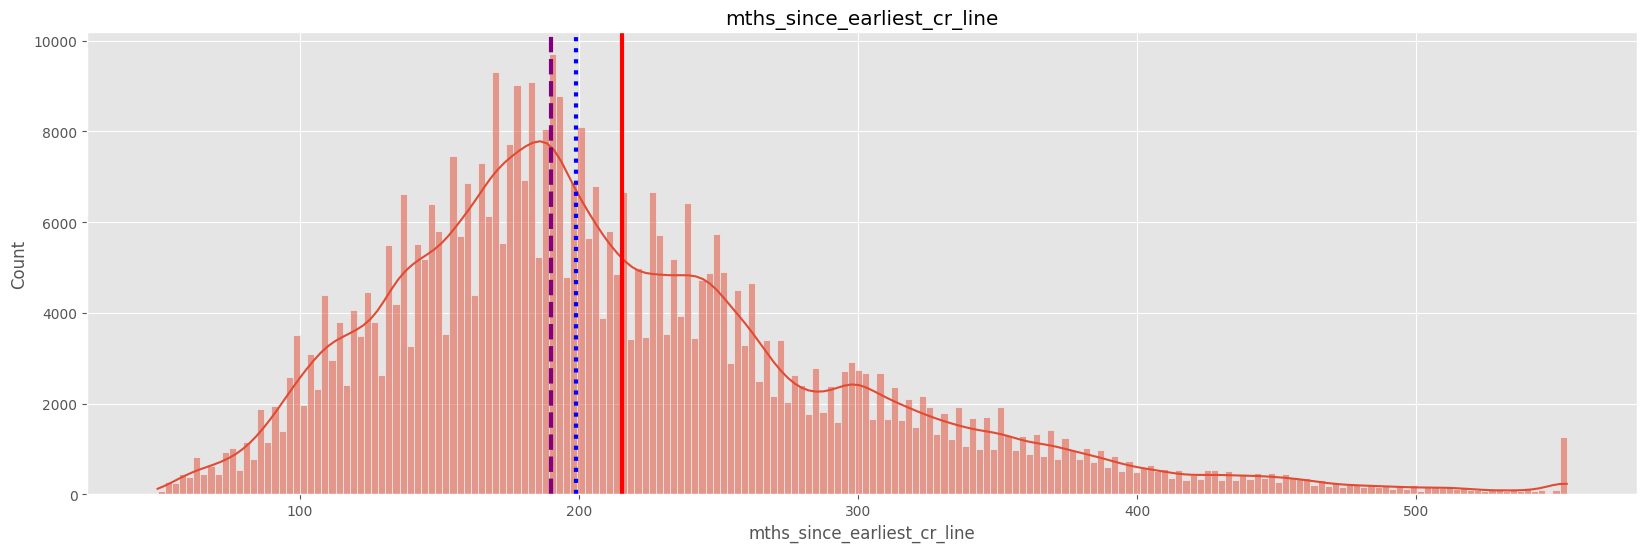



Ringkasan Statistik mths_since_issue_d
Rata-rata :  27.85
Median :  24.00
Standar Deviasi :  13.94
Modus :  15.0


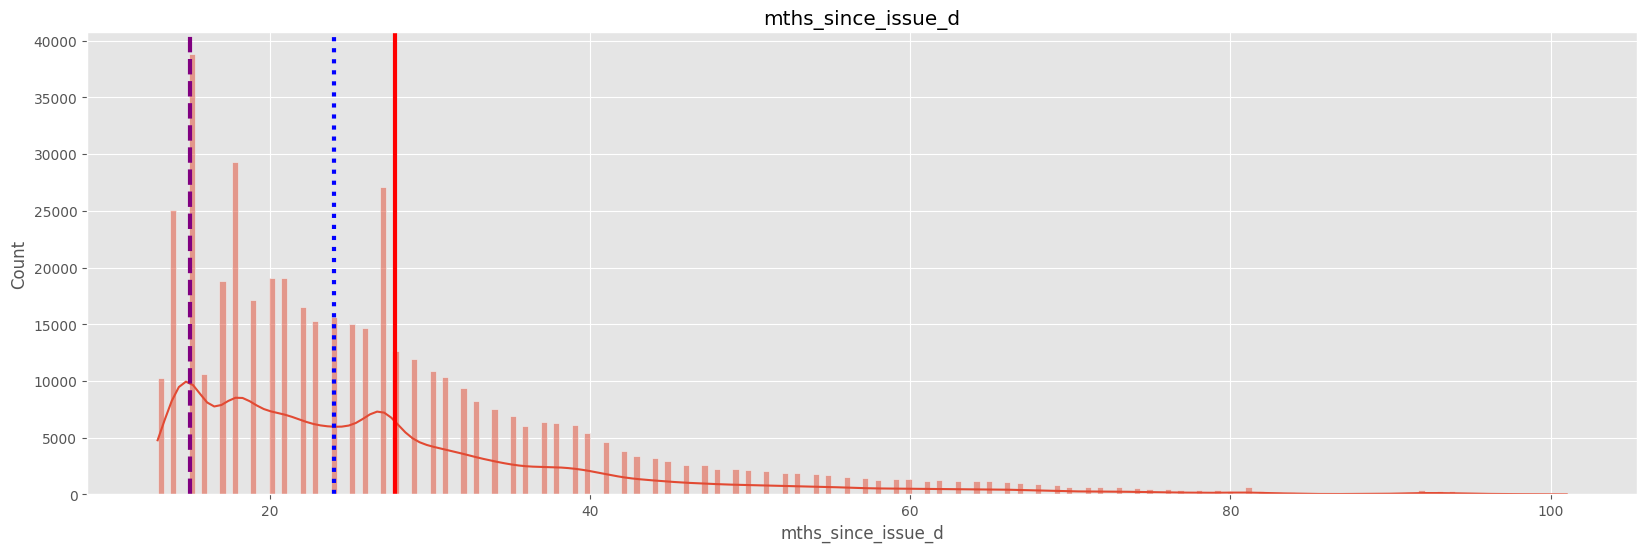



Ringkasan Statistik mths_since_last_pymnt_d
Rata-rata :  8.21
Median :  1.00
Standar Deviasi :  12.58
Modus :  0.0


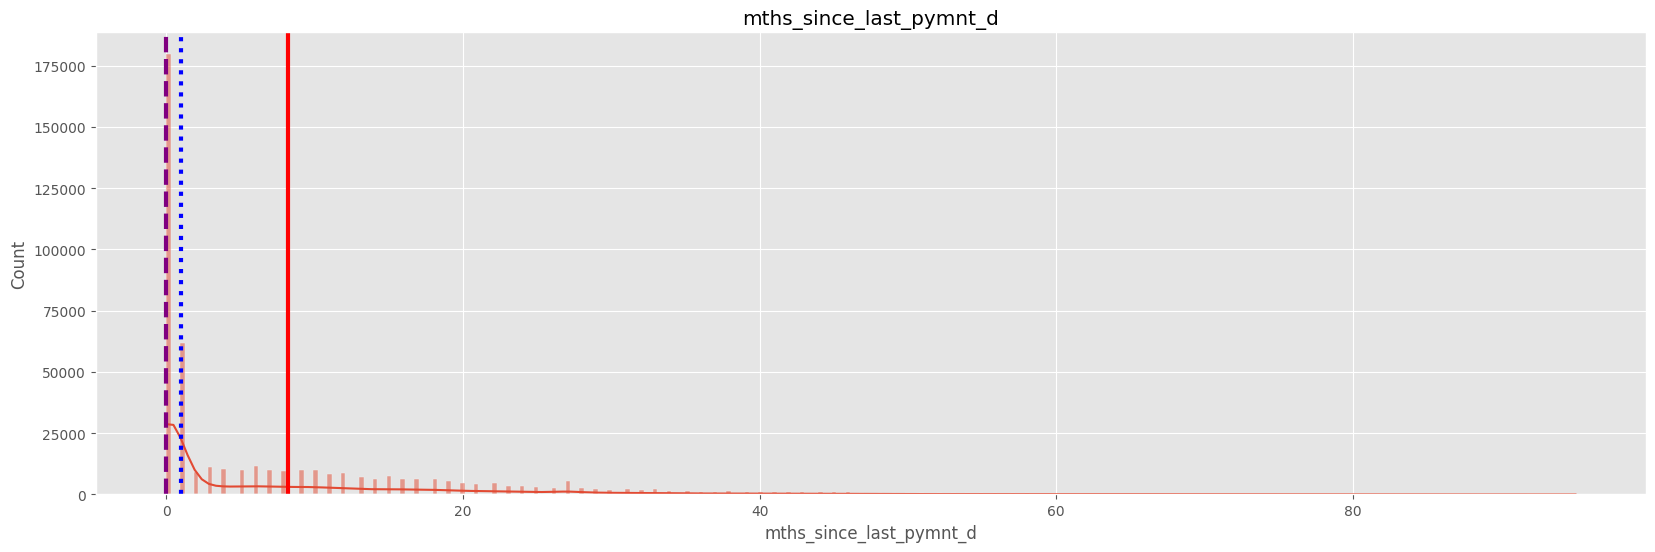



Ringkasan Statistik mths_since_next_pymnt_d
Rata-rata :  83.42
Median :  95.00
Standar Deviasi :  30.73
Modus :  95.0


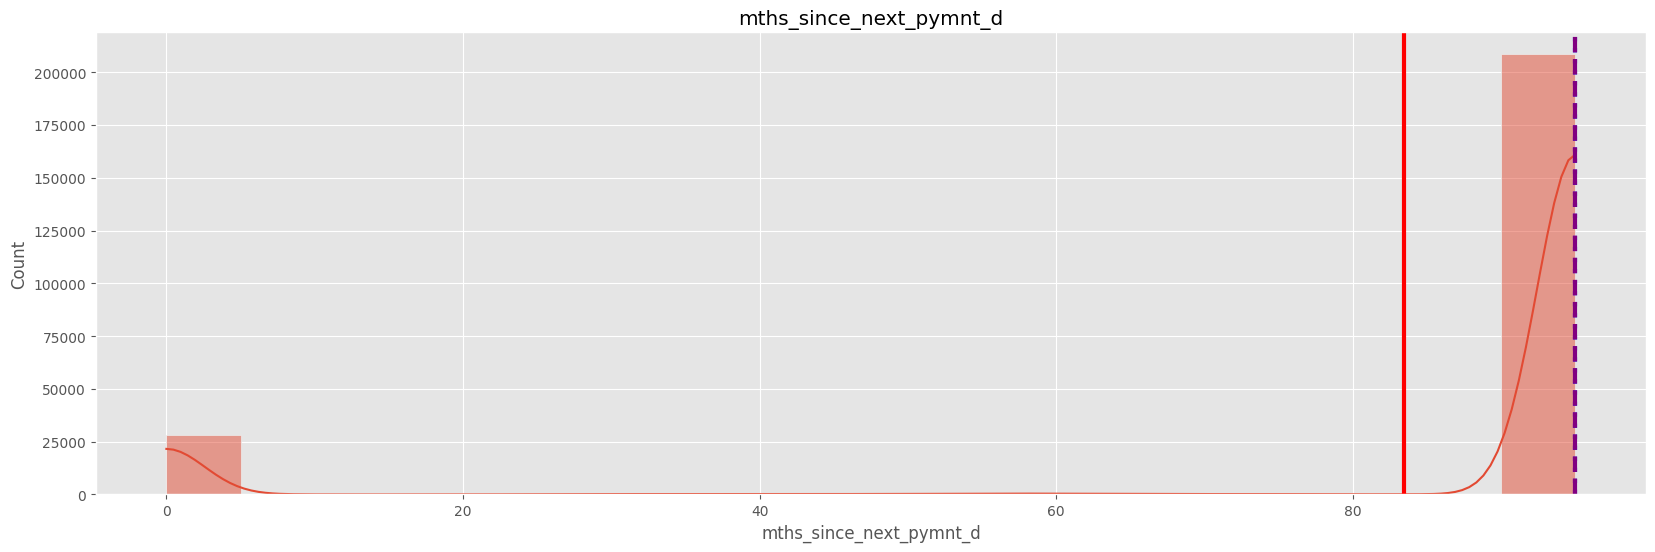



Ringkasan Statistik mths_since_last_credit_pull_d
Rata-rata :  4.01
Median :  0.00
Standar Deviasi :  9.48
Modus :  0.0


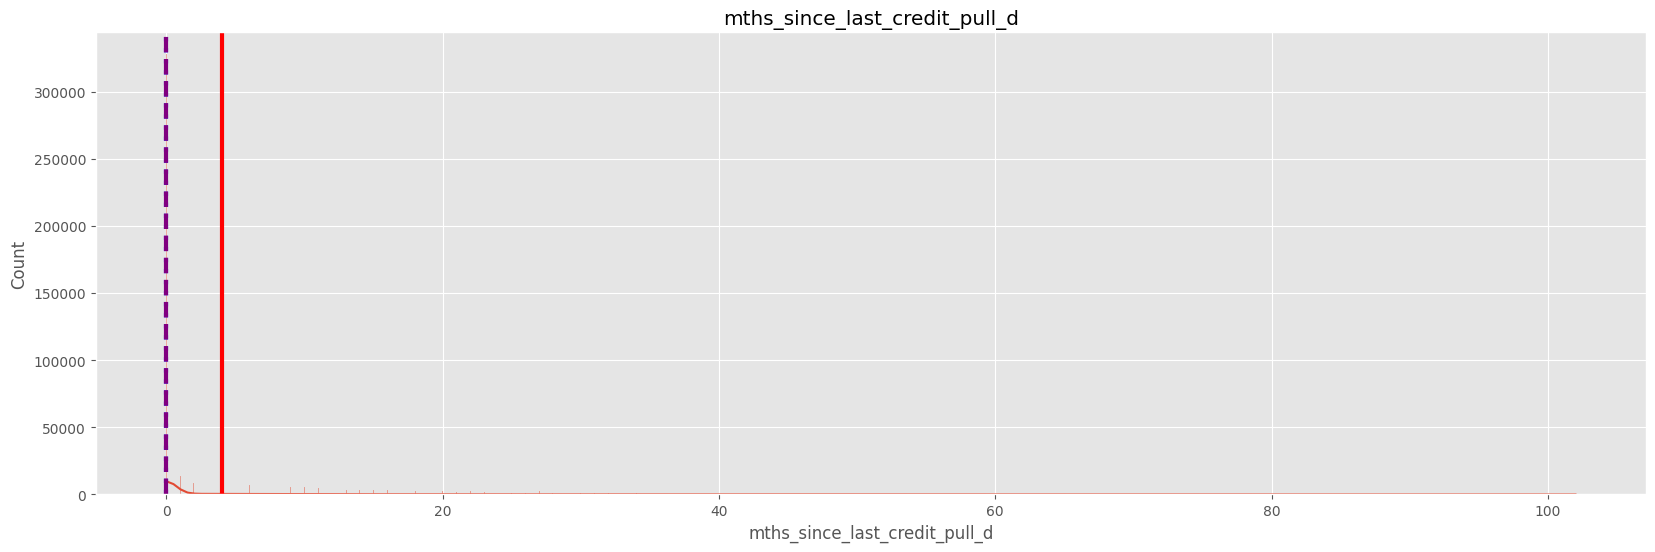

In [259]:
plt.style.use('ggplot')
for column in df.select_dtypes(exclude='object').columns.tolist():
  #Menghitung statistik deskriptif
  avg = df[column].mean()
  med = df[column].median()
  mod = df[column].mode().iloc[0]
  std = df[column].std()

  #Menampilkan ringkasan statistik
  print('Ringkasan Statistik {columns}'.format(columns=column))
  print('Rata-rata : ', "%.2f" % avg)
  print('Median : ', "%.2f" % med)
  print('Standar Deviasi : ', "%.2f" % std)
  print('Modus : ', mod)

  #Membuat plot
  plt.figure(figsize=(20,6))
  sns.histplot(df[column], kde=True)
  plt.axvline(avg, color='red', linestyle='solid', linewidth=3, label='Mean')
  plt.axvline(med, color='blue', linestyle='dotted', linewidth=3, label='Median')
  plt.axvline(mod, color='purple', linestyle='dashed', linewidth=3, label='Mode')
  plt.title(column)

  plt.show()
  print('\n')

## Bivariat Analysis

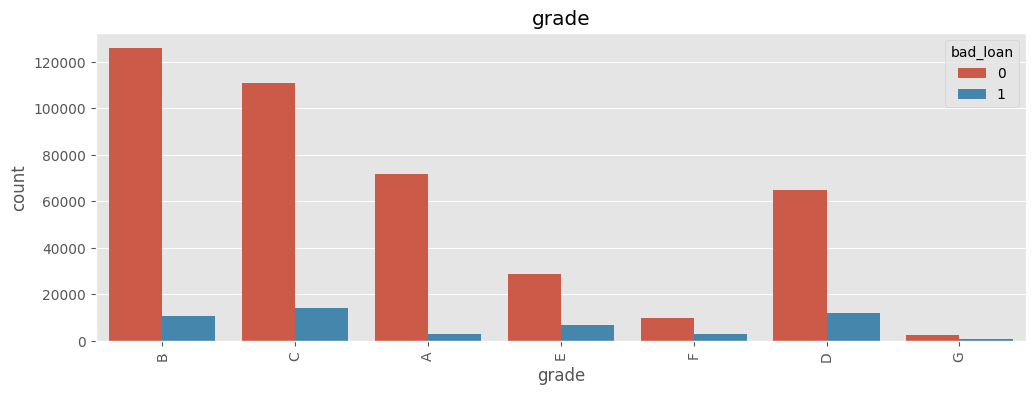

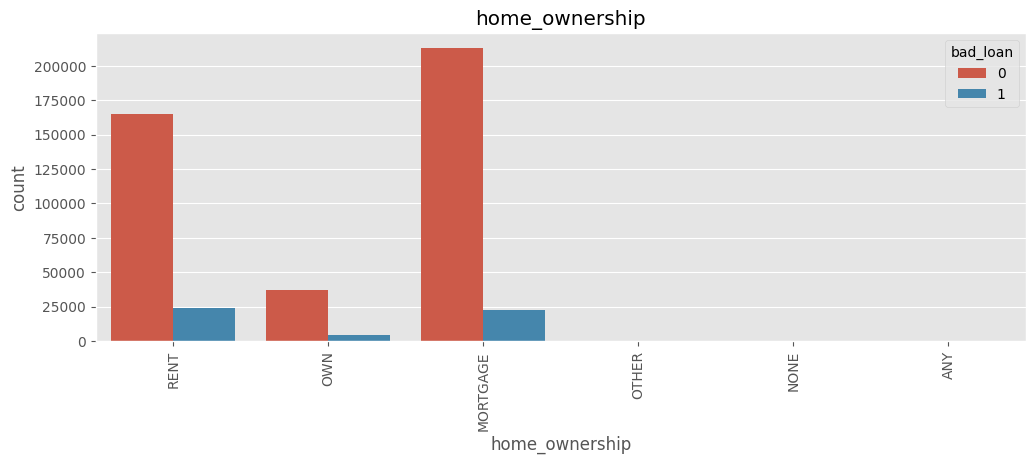

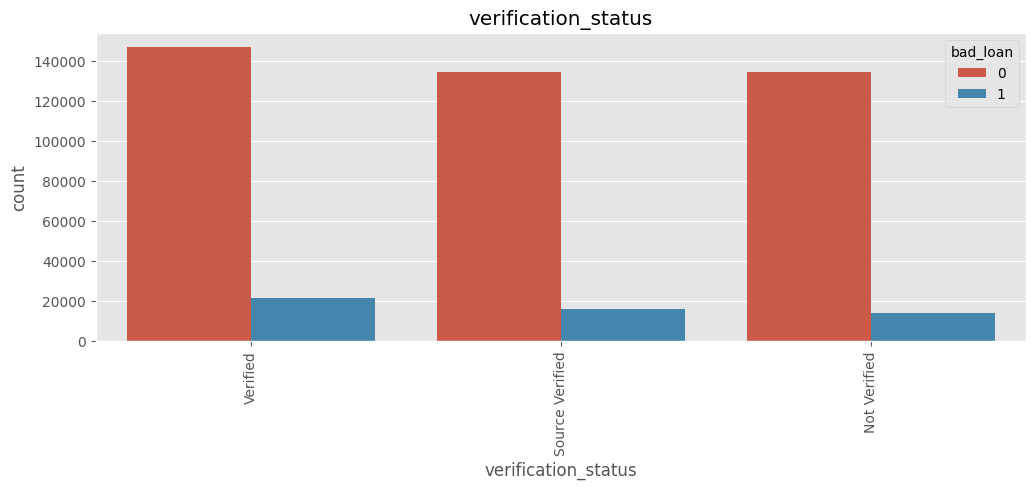

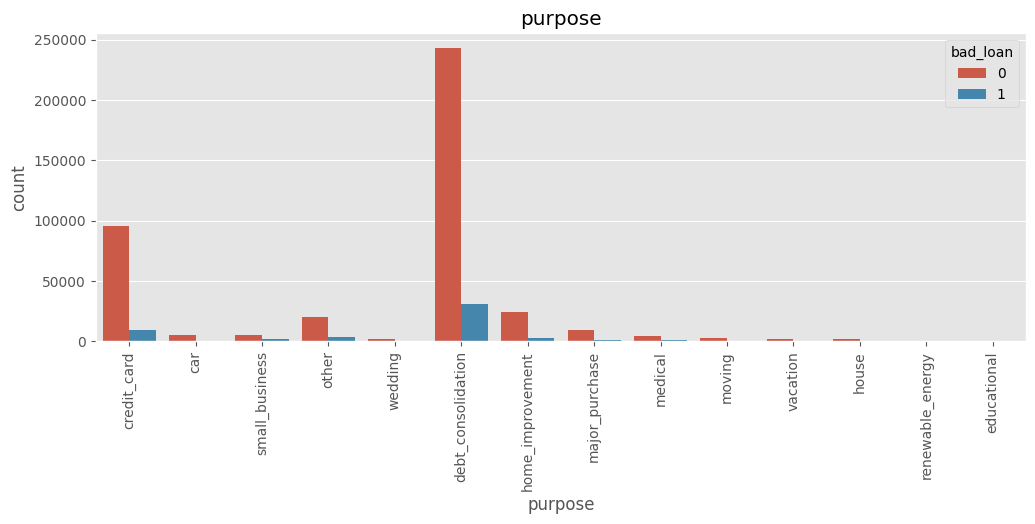

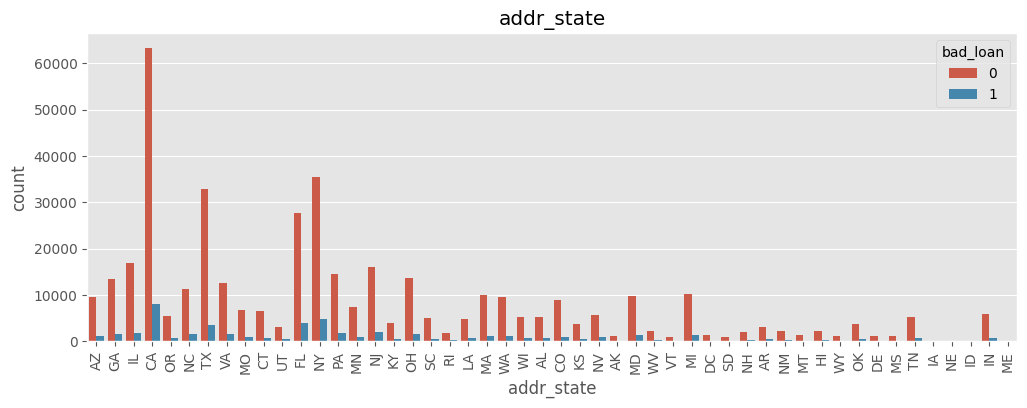

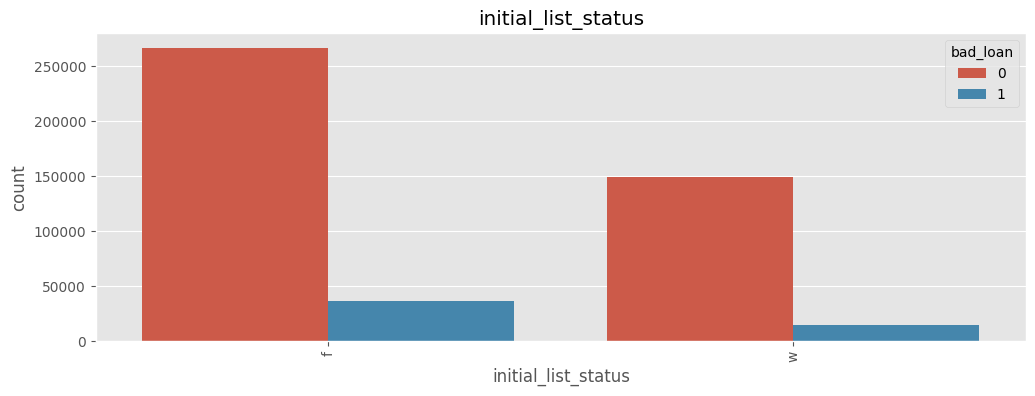

In [260]:
plt.style.use('ggplot')
for column in cat_dat:
  plt.figure(figsize=(12,4))
  sns.countplot(x=df[column], hue=df['bad_loan'])
  plt.title(column)
  plt.xticks(rotation=90)

  plt.show()
  print('\n')

#Data Preparation

## Missing value

In [261]:
total_rows = len(df)
missing_val = (df.isnull().sum() / total_rows * 100).sort_values(ascending=False)
print(missing_val[missing_val>70].to_string())

mths_since_last_record    86.566585


In [262]:
columns_to_drop = ['mths_since_last_record']
df.drop(columns=columns_to_drop, inplace=True, axis=1)

In [263]:
string_null = df.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

mths_since_last_delinq           250351
mths_since_next_pymnt_d          227214
mths_since_last_pymnt_d             376
revol_util                          340
collections_12_mths_ex_med          145
mths_since_last_credit_pull_d        42
acc_now_delinq                       29
mths_since_earliest_cr_line          29
total_acc                            29
delinq_2yrs                          29
inq_last_6mths                       29
open_acc                             29
pub_rec                              29
annual_inc                            4
int_rate                              0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
grade                                 0
total_rec_prncp                       0
bad_loan                              0
mths_since_issue_d                    0
term                                  0
funded_amnt_inv                       0


In [264]:
num_data = df.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'bad_loan', 'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_next_pymnt_d',
       'mths_since_last_credit_pull_d'],
      dtype='object')

In [265]:
cat_data = df.select_dtypes(include= 'object')
cat_data.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [266]:
#missing handle for numerical
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['mths_since_next_pymnt_d'].fillna(0, inplace=True)
df['mths_since_last_pymnt_d'].fillna(0, inplace=True)
df['mths_since_last_credit_pull_d'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [267]:
string_null = df.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

loan_amnt                        0
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med       0
acc_now_delinq                   0
bad_loan                         0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_next_pymnt_d          0
initial_list_status              0
revol_util                       0
funded_amnt                      0
revol_bal                        0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length          

## Label Encoding for Categorical Data

In [268]:
print(cat_data.columns)

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


Beberapa kolom dengan tipe data object perlu diubah menjadi nilai yang terukur karena model hanya mampu melakukan pelatihan terhadap nilai yang terukur. Sehingga dilakukan proses encoding. Metode encoding yang dilakukan yakni dengan Label Encoding dan One-Hot Encoding.

In [269]:
df['grade'].value_counts()

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

In [270]:
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

cat_data['grade'] = cat_data['grade'].map(grade_map)

In [271]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64

In [272]:
home_own_map = {
    'MORTGAGE': 1,
    'RENT'    : 2,
    'OWN'     : 3,
    'OTHER'   : 4,
    'NONE'    : 5,
    'ANY'     : 6
}

cat_data['home_ownership'] = cat_data['home_ownership'].map(home_own_map)

In [273]:
df['verification_status'].value_counts()

verification_status
Verified           168055
Source Verified    149993
Not Verified       148237
Name: count, dtype: int64

In [274]:
ver_status_map = {
    'Verified'        : 1,
    'Source Verified' : 2,
    'Not Verified'    : 3
}

cat_data['verification_status'] = cat_data['verification_status'].map(ver_status_map)

In [275]:
to_dummies = ['purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(cat_data[to_dummies])

In [276]:
dummies.head()

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [277]:
# drop kolom yang sudah di one encoded
cat_data.drop(to_dummies, axis=1, inplace=True)

In [278]:
# gabungkan kategorical dengan one hot encoded
cat_data_f = pd.concat([cat_data, dummies], axis = 1)
print(cat_data_f.columns)

Index(['grade', 'home_ownership', 'verification_status', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS',
       'addr_state_MT', 'addr_state_NC', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM',

In [279]:
num_data = df.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'bad_loan', 'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_next_pymnt_d',
       'mths_since_last_credit_pull_d'],
      dtype='object')

In [280]:
final_data = pd.concat([num_data, cat_data_f], axis = 1).dropna().reset_index().drop('index', axis = 1)
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,...,False,False,False,False,False,False,False,False,True,False
1,2500,2500,2500.0,60,15.27,59.83,0.0,30000.0,1.00,0.0,...,False,False,False,False,False,False,False,False,True,False
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,...,False,False,False,False,False,False,False,False,True,False
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,...,False,False,False,False,False,False,False,False,True,False
4,3000,3000,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,...,False,False,False,False,False,False,False,False,True,False


### Outlier Check with IQR

In [281]:
num_data = final_data.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       ...
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_f', 'initial_list_status_w'],
      dtype='object', length=104)

In [282]:
print(f'Jumlah baris sebelum memfilter outlier: {len(final_data)}')

filtered_entries = np.array([True] * len(final_data))
for col in ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((final_data[col] >= low_limit) & (final_data[col] <= high_limit)) & filtered_entries

final_data = final_data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(final_data)}')

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 433236


# Modeling

In [283]:
X = final_data.drop('bad_loan', axis = 1)
y = final_data['bad_loan']

In [284]:
from collections import Counter

print(Counter(y))

Counter({0: 385798, 1: 47438})


In [285]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=123)
X,y = smote.fit_resample(X,y)
print(Counter(y))

Counter({0: 385798, 1: 385798})


In [286]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Decision Tree

In [293]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [294]:
from sklearn.tree import DecisionTreeClassifier

dcs_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dcs_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_dcs_tree = grid_search.best_estimator_

y_pred = best_dcs_tree.predict(X_test)
accuracy_dcs = accuracy_score(y_test, y_pred)

print("Akurasi Model:", accuracy_dcs)
print("Akurasi Model: {:.2%}".format(accuracy_dcs))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Akurasi Model: 0.9719672194885929
Akurasi Model: 97.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    115553
           1       0.95      0.99      0.97    115926

    accuracy                           0.97    231479
   macro avg       0.97      0.97      0.97    231479
weighted avg       0.97      0.97      0.97    231479



### Logistic Regression

In [301]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1],
    'penalty' : ['l1', 'l2', 'elasticnet', None],

}

In [302]:
logreg = LogisticRegression()

grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search_logreg.fit(X_train, y_train)

print("Best Parameter:", grid_search_logreg.best_params_)

best_logreg = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Akurasi Model:", accuracy_logreg)
print("Akurasi Model: {:.2%}".format(accuracy_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Best Parameter: {'C': 0.0001, 'penalty': None}
Akurasi Model: 0.9260019267406546
Akurasi Model: 92.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93    115553
           1       1.00      0.86      0.92    115926

    accuracy                           0.93    231479
   macro avg       0.93      0.93      0.93    231479
weighted avg       0.93      0.93      0.93    231479



## Conclution

| No  | Algoritma       | Akurasi | Precision | Recall | F-Score |
|-----|-----------------|---------|-----------|--------|---------|
| 1   | Decision Tree   | 0.97  |      0.95     |   0.99     |    0.97     |
| 2   | Logistic Regression   | 0.93  |     1.00      |    0.86    |   0.92      |


Dari hasil evaluasi matriks tersebut, dapat disimpulkan bahwa model Decision Tree memiliki hasil yang lebih optimal dengan akurasi sebesar 0.97; precision sebesar 0.95; recall sebesar 0.99 dan F1-Score sebesar 0.97. Meskipun Logistic Regression memiliki nilai recall yang maksimum, namun Decision Tree memiliki hasil secara keseluruhan yang lebih stabil.